In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from autots import AutoTS

df = pd.read_csv('refunds.csv')
df['month'] = pd.to_datetime(df['month'], format = '%d/%m/%Y')
df.set_index('month', inplace = True)

df.head(3)

,refunds
month,
2024-04-01,10287311.3
2024-03-01,17274184.4
2024-02-01,16046430.2


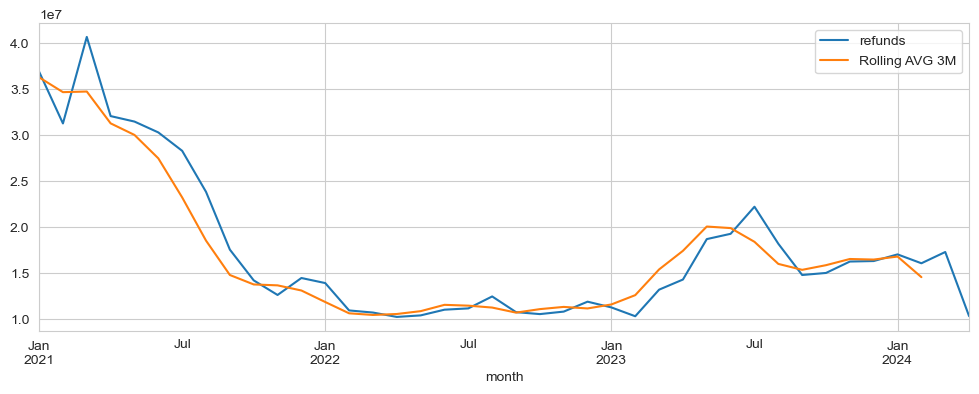

In [2]:
param = df.columns[0]

temp = df.copy()
roll_months = 3

new_col = f'Rolling AVG {roll_months}M'
temp[new_col] = temp[param].rolling(window = roll_months).mean()

sns.set_style('whitegrid')
temp.plot(figsize = (12,4));

In [3]:
from autots.models.model_list import model_lists
for m in model_lists.keys():
    print(m)

all
default
fast
superfast
parallel
fast_parallel
fast_parallel_no_arima
scalable
probabilistic
multivariate
univariate
no_params
recombination_approved
no_shared
no_shared_fast
experimental
slow
gpu
regressor
best
motifs
all_result_path
regressions
all_pragmatic
update_fit


In [4]:
model = AutoTS(
               forecast_length = 12,
               frequency = 'MS',
               prediction_interval = 0.9,
               model_list = 'univariate',
               max_generations = 15,
               num_validations = 3,
               no_negatives = True,
               n_jobs = 'auto', 
              )

Using 6 cpus for n_jobs.


In [5]:
%%time

model.fit(df[param])
prediction = model.predict(forecast_length = 12)

Data frequency is: MS, used frequency is: MS
Too many training validations for length of data provided, decreasing num_validations to 1
Model Number: 1 with model ARIMA in generation 0 of 15
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.01385D+01    |proj g|=  6.31454D+00

At iterate    1    f=  1.69333D+01    |proj g|=  8.19367D-02

At iterate    2    f=  1.69216D+01    |proj g|=  6.67578D-02

At iterate    3    f=  1.69052D+01    |proj g|=  5.43578D-02


 This problem is unconstrained.



At iterate    4    f=  1.69002D+01    |proj g|=  1.92590D-02

At iterate    5    f=  1.68992D+01    |proj g|=  9.86007D-03

At iterate    6    f=  1.68986D+01    |proj g|=  1.13840D-02

At iterate    7    f=  1.68981D+01    |proj g|=  9.98575D-03

At iterate    8    f=  1.68972D+01    |proj g|=  1.09175D-02

At iterate    9    f=  1.68959D+01    |proj g|=  1.19573D-02

At iterate   10    f=  1.68955D+01    |proj g|=  7.87172D-03

At iterate   11    f=  1.68952D+01    |proj g|=  2.50980D-03

At iterate   12    f=  1.68951D+01    |proj g|=  5.07934D-04

At iterate   13    f=  1.68951D+01    |proj g|=  2.22733D-04

At iterate   14    f=  1.68951D+01    |proj g|=  1.75373D-04

At iterate   15    f=  1.68951D+01    |proj g|=  1.85968D-04

At iterate   16    f=  1.68951D+01    |proj g|=  1.66663D-04

At iterate   17    f=  1.68951D+01    |proj g|=  3.23466D-04

At iterate   18    f=  1.68951D+01    |proj g|=  5.53106D-04

At iterate   19    f=  1.68951D+01    |proj g|=  7.59551D-04

At iter

/Users/itaymi/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/itaymi/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Epoch 1/50


/Users/itaymi/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.3341
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3318
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3374
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3262
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3301
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3239
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3333
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.3340
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.3244
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3271
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3281
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3255
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3263
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3201
Epoch 15/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3280
Epoch 16/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss:

09:15:37 - cmdstanpy - INFO - Chain [1] start processing
09:15:37 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 27 with model DatepartRegression in generation 0 of 15
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 27 in generation 0: DatepartRegression
Model Number: 28 with model SeasonalNaive in generation 0 of 15
Model Number: 29 with model DatepartRegression in generation 0 of 15
Model Number: 30 with model UnobservedComponents in generation 0 of 15
Model Number: 31 with model UnobservedComponents in generation 0 of 15
Model Number: 32 with model ETS in generation 0 of 15
Model Number: 33 with model ARDL in generation 0 of 15
Model Number: 34 with model UnivariateMotif in generation 0 of 15
Template Eval Error: ValueError('window shape cannot be larger than input array shape') in model 34 in generation 0: UnivariateMotif
Model Number: 35 with model UnivariateMotif in generation 0 of 15
Template Eval Error: ValueError('kth(=5) out of bounds (3)') in model 35 in generation 0: UnivariateMotif
Model Number: 36 with model FBProphet i

 This problem is unconstrained.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Model Number: 68 with model FFT in generation 0 of 15
Model Number: 69 with model UnivariateRegression in generation 0 of 15
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 69 in generation 0: UnivariateRegression
Model Number: 70 with model ARCH in generation 0 of 15
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 70 in generation 0: ARCH
Model Number: 71 with model UnivariateMotif in generation 0 of 15
Model Number: 72 with model SeasonalityMotif in generation 0 of 15
Model Number: 73 with model PreprocessingRegression in generation 0 of 15
Template Eval Error: Exception('Transformer ScipyFilter failed on fit') in model 73 in generation 0: PreprocessingRegression
Model Number: 74 with model NeuralProphet in generation 0 of 15
Template Eval Error: ModuleNotFoundError("No module named 'neuralprophet'") in model 74 in generation 0: NeuralProphet
Model Number: 75 with model ConstantNaive in gener

/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)
/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:445: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)
/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: divide by zero encountered in divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
 This problem is unconstrained.
/Users/itaymi/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_regression.py:505: UserWarning: 

Template Eval Error: ValueError('window shape cannot be larger than input array shape') in model 109 in generation 0: SeasonalityMotif
Model Number: 110 with model SeasonalityMotif in generation 0 of 15
Model Number: 111 with model SeasonalNaive in generation 0 of 15
Template Eval Error: Exception("Transformer Detrend failed on fit from params quadratic {'0': {'method': 'clip', 'std_threshold': 3, 'fillna': None}, '1': {'model': 'GLS', 'phi': 1, 'window': 10, 'transform_dict': {'fillna': None, 'transformations': {'0': 'ScipyFilter'}, 'transformation_params': {'0': {'method': 'savgol_filter', 'method_args': {'window_length': 31, 'polyorder': 3, 'deriv': 0, 'mode': 'interp'}}}}}, '2': {'cutoff': 0.005, 'reverse': False}}") in model 111 in generation 0: SeasonalNaive
Model Number: 112 with model AverageValueNaive in generation 0 of 15
Model Number: 113 with model GLM in generation 0 of 15
Template Eval Error: Exception("Transformer RegressionFilter failed on fit from params mean {'0': {'s

/Users/itaymi/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:2525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 210295930762696.62, tolerance: 335980824032.1175
  ) = cd_fast.enet_coordinate_descent_multi_task(


Model Number: 123 with model Theta in generation 0 of 15
Model Number: 124 with model SeasonalityMotif in generation 0 of 15
Template Eval Error: Exception("Transformer HolidayTransformer failed on fit from params akima {'0': {}, '1': {'method': 0.5}, '2': {'output_distribution': 'uniform', 'n_quantiles': 2}, '3': {}, '4': {'threshold': 1.0, 'splash_threshold': None, 'use_dayofmonth_holidays': True, 'use_wkdom_holidays': True, 'use_wkdeom_holidays': False, 'use_lunar_holidays': False, 'use_lunar_weekday': False, 'use_islamic_holidays': False, 'use_hebrew_holidays': False, 'anomaly_detector_params': {'method': 'rolling_zscore', 'method_params': {'distribution': 'norm', 'alpha': 0.03, 'rolling_periods': 90, 'center': True}, 'fillna': 'rolling_mean_24', 'transform_dict': {'transformations': {'0': 'DatepartRegression'}, 'transformation_params': {'0': {'datepart_method': 'simple_3', 'regression_model': {'model': 'DecisionTree', 'model_params': {'max_depth': None, 'min_samples_split': 0.1}}}

/Users/itaymi/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=3.81949e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 133 with model GLS in generation 0 of 15
Model Number: 134 with model DatepartRegression in generation 0 of 15
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 134 in generation 0: DatepartRegression
Model Number: 135 with model UnivariateMotif in generation 0 of 15
Model Number: 136 with model MetricMotif in generation 0 of 15
Template Eval Error: ValueError('window shape cannot be larger than input array shape') in model 136 in generation 0: MetricMotif
Model Number: 137 with model ARIMA in generation 0 of 15
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.00412D+00    |proj g|=  7.57279D-01

At iterate    1    f=  8.77578D-01    |proj g|=  5.12362D-01

At iterate    2    f=  7.28080D-01    |proj g|=  1.72899D-01

At iterate    3    f=  6.77003D-01    |proj g|=  9.84379D-01

At i

 This problem is unconstrained.



At iterate    5    f=  5.85487D-01    |proj g|=  2.20110D-01

At iterate    6    f=  5.73551D-01    |proj g|=  1.57060D-01

At iterate    7    f=  5.61944D-01    |proj g|=  9.38657D-02

At iterate    8    f=  5.53129D-01    |proj g|=  6.47660D-02

At iterate    9    f=  5.41216D-01    |proj g|=  9.71478D-02

At iterate   10    f=  5.20092D-01    |proj g|=  2.56189D-01

At iterate   11    f=  4.86114D-01    |proj g|=  1.92507D-01

At iterate   12    f=  4.67940D-01    |proj g|=  1.58152D-01

At iterate   13    f=  4.56059D-01    |proj g|=  1.85944D-01

At iterate   14    f=  4.39522D-01    |proj g|=  1.82942D-01

At iterate   15    f=  4.30975D-01    |proj g|=  1.50628D-01

At iterate   16    f=  4.23929D-01    |proj g|=  2.36451D-01

At iterate   17    f=  4.18273D-01    |proj g|=  1.05816D-01

At iterate   18    f=  4.15852D-01    |proj g|=  7.03927D-02

At iterate   19    f=  4.13273D-01    |proj g|=  9.72035D-02

At iterate   20    f=  4.11829D-01    |proj g|=  1.20236D-01

At iter

Model Number: 138 with model LastValueNaive in generation 0 of 15
Model Number: 139 with model NeuralProphet in generation 0 of 15
Template Eval Error: ModuleNotFoundError("No module named 'neuralprophet'") in model 139 in generation 0: NeuralProphet
Model Number: 140 with model UnobservedComponents in generation 0 of 15
Model Number: 141 with model MetricMotif in generation 0 of 15
Template Eval Error: ValueError('window shape cannot be larger than input array shape') in model 141 in generation 0: MetricMotif
Model Number: 142 with model AverageValueNaive in generation 0 of 15
Model Number: 143 with model AverageValueNaive in generation 0 of 15
Model Number: 144 with model SeasonalityMotif in generation 0 of 15



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 145 with model KalmanStateSpace in generation 0 of 15
Model Number: 146 with model Theta in generation 0 of 15
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params rolling_mean_24 {'0': {}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}, '2': {'method': 0.5}, '3': {}, '4': {'regression_model': {'model': 'ElasticNet', 'model_params': {}}, 'datepart_method': 'simple_binarized', 'polynomial_degree': None, 'transform_dict': {'fillna': None, 'transformations': {'0': 'EWMAFilter'}, 'transformation_params': {'0': {'span': 7}}}, 'holiday_countries_used': True}}") in model 146 in generation 0: Theta
Model Number: 147 with model MetricMotif in generation 0 of 15
Template Eval Error: ValueError('kth(=9) out of bounds (9)') in model 147 in generation 0: MetricMotif
Model Number: 148 with model KalmanStateSpace in generation 0 of 15
Model Number: 149 with model DatepartRegression in generation 0 of 15
Mod

/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/itaymi/anaconda3/lib/python3.11/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)
/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model Number: 171 with model KalmanStateSpace in generation 1 of 15
Model Number: 172 with model LastValueNaive in generation 1 of 15
Model Number: 173 with model AverageValueNaive in generation 1 of 15
Model Number: 174 with model ARIMA in generation 1 of 15
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.25589D-02    |proj g|=  1.10343D+00

At iterate    1    f=  3.61032D-02    |proj g|=  4.67977D-01

At iterate    2    f= -1.67006D-02    |proj g|=  3.24566D-01

At iterate    3    f= -6.95930D-02    |proj g|=  9.52300D-01

At iterate    4    f= -9.48547D-02    |proj g|=  3.63563D-01

At iterate    5    f= -1.05873D-01    |proj g|=  1.40766D-01

At iterate    6    f= -1.15891D-01    |proj g|=  2.63497D-01

At iterate    7    f= -1.26284D-01    |proj g|=  2.88246D-01

At iterate    8    f= -1.34132D-01    |proj g|=  6.37136D-02

At iterate    

 This problem is unconstrained.


Model Number: 175 with model ETS in generation 1 of 15
Model Number: 176 with model UnobservedComponents in generation 1 of 15
Model Number: 177 with model LastValueNaive in generation 1 of 15
Model Number: 178 with model AverageValueNaive in generation 1 of 15
Model Number: 179 with model DatepartRegression in generation 1 of 15
Epoch 1/50


/Users/itaymi/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 1.1349
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1.1052
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1.0906
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1.0877
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1.0885
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1.0865
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1.0864
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 1.0839
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1.0840
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1.0841
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1.0836
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1.0833
Epoch 13/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1.0854
Epoch 14/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 1.0825
Epoch 15/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 1.0830
Epoch 16/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/

Model Number: 208 with model GLM in generation 1 of 15
Model Number: 209 with model SeasonalityMotif in generation 1 of 15
Model Number: 210 with model SeasonalityMotif in generation 1 of 15
Model Number: 211 with model UnivariateRegression in generation 1 of 15
Template Eval Error: ValueError('Input X contains NaN.\nLinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values') in model 211 in generation 1: UnivariateRegression
Model Numbe

/Users/itaymi/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_regression.py:505: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)
/Users/itaymi/anaconda3/lib/python3.11/site-packages/autots/tools/fast_kalman.py:1092: RuntimeWarning: overflow encountered in cast
  result.smoothed.states.cov[:, j, :, :] = Ps
/Users/itaymi/anaconda3/lib/python3.11/site-packages/autots/tools/fast_kalman.py:1098: RuntimeWarning: overflow encountered in cast
  result.smoothed.observations.cov[:, j, :, :] = obs_cov
/Users/itaymi/anaconda3/lib/python3.11/site-packages/autots/tools/fast_kalman.py:1296: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, B)
/Users/itaymi/anaconda3/lib/python3.11/site-packages/autots/tools/fast_kalman.py:1309: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/Users/itaymi/anaconda3/lib/python3.11/site-packages/autots/tools/fast_

Model Number: 217 with model SeasonalityMotif in generation 1 of 15
Template Eval Error: ValueError('kth(=19) out of bounds (19)') in model 217 in generation 1: SeasonalityMotif
Model Number: 218 with model KalmanStateSpace in generation 1 of 15
Model Number: 219 with model ARIMA in generation 1 of 15
Template Eval Error: Exception("Transformer Cointegration failed on fit from params rolling_mean_24 {'0': {'det_order': -1, 'k_ar_diff': 0}, '1': {'rows': 1, 'lag': 2, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}, '2': {'rows': 1, 'lag': 28, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}}") in model 219 in generation 1: ARIMA
Model Number: 220 with model ARDL in generation 1 of 15
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 220 in generation 1: ARDL
Model Number: 221 with model SeasonalityMotif in generation 1 of 15
Model Number: 222 with model DatepartRegression in generation 1 of 15
Model Num

/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
 This problem is unconstrained.



At iterate    5    f=  1.54927D+01    |proj g|=  9.14230D-02

At iterate    6    f=  1.54892D+01    |proj g|=  1.13868D-01

At iterate    7    f=  1.54862D+01    |proj g|=  8.10433D-02

At iterate    8    f=  1.54792D+01    |proj g|=  1.45224D-01

At iterate    9    f=  1.54731D+01    |proj g|=  1.23332D-01

At iterate   10    f=  1.54646D+01    |proj g|=  1.61726D-01

At iterate   11    f=  1.54581D+01    |proj g|=  1.38167D-01

At iterate   12    f=  1.54544D+01    |proj g|=  8.71670D-02

At iterate   13    f=  1.54501D+01    |proj g|=  5.88390D-02

At iterate   14    f=  1.54458D+01    |proj g|=  2.62994D-02

At iterate   15    f=  1.54444D+01    |proj g|=  9.07995D-02

At iterate   16    f=  1.54427D+01    |proj g|=  5.19522D-02

At iterate   17    f=  1.54419D+01    |proj g|=  4.19435D-02

At iterate   18    f=  1.54416D+01    |proj g|=  1.63872D-02

At iterate   19    f=  1.54415D+01    |proj g|=  1.06388D-02

At iterate   20    f=  1.54415D+01    |proj g|=  6.49033D-03

At iter

Model Number: 244 with model UnobservedComponents in generation 1 of 15
Model Number: 245 with model LastValueNaive in generation 1 of 15
Model Number: 246 with model AverageValueNaive in generation 1 of 15


/Users/itaymi/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/itaymi/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 247 with model FBProphet in generation 1 of 15
Model Number: 248 with model KalmanStateSpace in generation 1 of 15
Model Number: 249 with model UnivariateRegression in generation 1 of 15
Model Number: 250 with model FBProphet in generation 1 of 15
Model Number: 251 with model GLS in generation 1 of 15
Model Number: 252 with model ARDL in generation 1 of 15
Model Number: 253 with model SeasonalNaive in generation 1 of 15
Model Number: 254 with model GLM in generation 1 of 15
Model Number: 255 with model LastValueNaive in generation 1 of 15
Model Number: 256 with model DatepartRegression in generation 1 of 15
Template Eval Error: Exception("Transformer FastICA failed on fit from params ffill {'0': {'output_distribution': 'normal', 'n_quantiles': 20}, '1': {'model': 'Linear', 'phi': 1, 'window': None}, '2': {}, '3': {'algorithm': 'deflation', 'fun': 'logcosh', 'max_iter': 500, 'whiten': True}}") in model 256 in generation 1: DatepartRegression
Model Number: 257 with model Av

/Users/itaymi/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.6727
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6832
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6818
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6804
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6809
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6816
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6792
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6778
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6774
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6781
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6804
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6717
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6771
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6747
Epoch 15/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6813
Epoch 16/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss

Model Number: 280 with model KalmanStateSpace in generation 2 of 15
Model Number: 281 with model SeasonalityMotif in generation 2 of 15
Template Eval Error: ValueError('window shape cannot be larger than input array shape') in model 281 in generation 2: SeasonalityMotif
Model Number: 282 with model Theta in generation 2 of 15
Template Eval Error: Exception("Transformer FastICA failed on fit from params fake_date {'0': {'algorithm': 'deflation', 'fun': 'cube', 'max_iter': 250, 'whiten': True}, '1': {}, '2': {'constant': 1, 'reintroduction_model': None, 'fillna': 'ffill'}, '3': {'rows': 1, 'lag': 1, 'method': 'multiplicative', 'strength': 0.9, 'first_value_only': False}, '4': {'part': 'trend', 'lamb': 104976000000}, '5': {'sigma': 1.5, 'rolling_window': 90, 'run_order': 'trend_first', 'regression_params': {'regression_model': {'model': 'ElasticNet', 'model_params': {}}, 'datepart_method': 'expanded', 'polynomial_degree': None, 'transform_dict': None, 'holiday_countries_used': True}, 'hol

/Users/itaymi/anaconda3/lib/python3.11/site-packages/autots/tools/thresholding.py:204: RuntimeWarning: overflow encountered in scalar power
  (1 + mean_perc_decrease) ** self.mean_weight
 This problem is unconstrained.


Model Number: 287 with model ETS in generation 2 of 15
Model Number: 288 with model Theta in generation 2 of 15
Model Number: 289 with model AverageValueNaive in generation 2 of 15
Model Number: 290 with model DatepartRegression in generation 2 of 15
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params mean {'0': {'rows': 1, 'lag': 7, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '1': {}, '2': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '3': {'rows': 1, 'lag': 7, 'method': 'additive', 'strength': 0.7, 'first_value_only': True}, '4': {'rows': 1, 'lag': 1, 'method': 'multiplicative', 'strength': 0.9, 'first_value_only': True}}") in model 290 in generation 2: DatepartRegression
Model Number: 291 with model LastValueNaive in generation 2 of 15
Model Number: 292 with model AverageValueNaive in generation 2 of 15
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse fr

/Users/itaymi/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_regression.py:505: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Model Number: 328 with model SeasonalityMotif in generation 2 of 15
Template Eval Error: ValueError('window shape cannot be larger than input array shape') in model 328 in generation 2: SeasonalityMotif
Model Number: 329 with model FFT in generation 2 of 15
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'ffill', 'transformations': {'0': 'PowerTransformer', '1': 'ClipOutliers', '2': 'Detrend', '3': 'KalmanSmoothing'}, 'transformation_params': {'0': {}, '1': {'method': 'remove', 'std_threshold': 2, 'fillna': 'rolling_mean_24'}, '2': {'model': 'GLS', 'phi': 1, 'window': 90, 'transform_dict': {'fillna': None, 'transformations': {'0': 'Discretize'}, 'transformation_params': {'0': {'discretization': 'center', 'n_bins': 20}}}}, '3': {'model_name': 'locallinear_weekly_fourier', 'state_transition': [[1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0, 0.0,


At iterate    5    f= -2.22404D+00    |proj g|=  3.63399D+00

At iterate    6    f= -2.57524D+00    |proj g|=  1.55045D+01

At iterate    7    f= -2.75511D+00    |proj g|=  1.64864D+01

At iterate    8    f= -2.84429D+00    |proj g|=  5.50247D+00

At iterate    9    f= -2.84911D+00    |proj g|=  2.26552D-01

At iterate   10    f= -2.84943D+00    |proj g|=  3.57184D+00

At iterate   11    f= -2.84991D+00    |proj g|=  4.76184D-01

At iterate   12    f= -2.84995D+00    |proj g|=  1.74808D-01

At iterate   13    f= -2.85001D+00    |proj g|=  5.12605D-01

At iterate   14    f= -2.85017D+00    |proj g|=  9.11158D-01

At iterate   15    f= -2.85098D+00    |proj g|=  2.12948D+00


 This problem is unconstrained.



At iterate   16    f= -2.85259D+00    |proj g|=  3.64530D+00

At iterate   17    f= -2.85761D+00    |proj g|=  6.30347D+00

At iterate   18    f= -2.86582D+00    |proj g|=  8.33970D+00

At iterate   19    f= -2.87702D+00    |proj g|=  7.49560D+00

At iterate   20    f= -2.87778D+00    |proj g|=  9.39969D+00

At iterate   21    f= -2.88457D+00    |proj g|=  5.45425D+00

At iterate   22    f= -2.88759D+00    |proj g|=  9.44097D-02

At iterate   23    f= -2.88777D+00    |proj g|=  1.61532D-01

At iterate   24    f= -2.88777D+00    |proj g|=  1.14088D-01

At iterate   25    f= -2.88778D+00    |proj g|=  9.40138D-02

At iterate   26    f= -2.89048D+00    |proj g|=  1.13432D+00

At iterate   27    f= -2.89832D+00    |proj g|=  1.48189D+00

At iterate   28    f= -2.90010D+00    |proj g|=  6.66592D-01

At iterate   29    f= -2.90038D+00    |proj g|=  8.26567D-02

At iterate   30    f= -2.90042D+00    |proj g|=  1.60451D-01

At iterate   31    f= -2.90045D+00    |proj g|=  4.98377D-01

At iter

Model Number: 333 with model ARDL in generation 2 of 15
Model Number: 334 with model AverageValueNaive in generation 2 of 15
Model Number: 335 with model SeasonalityMotif in generation 2 of 15
Template Eval Error: ValueError('window shape cannot be larger than input array shape') in model 335 in generation 2: SeasonalityMotif
Model Number: 336 with model UnivariateRegression in generation 2 of 15
Model Number: 337 with model UnivariateRegression in generation 2 of 15
Model Number: 338 with model FBProphet in generation 2 of 15
Model Number: 339 with model FFT in generation 2 of 15
Model Number: 340 with model UnivariateRegression in generation 2 of 15
Model Number: 341 with model SeasonalityMotif in generation 2 of 15
Model Number: 342 with model GLS in generation 2 of 15
Model Number: 343 with model AverageValueNaive in generation 2 of 15
Model Number: 344 with model ARDL in generation 2 of 15
Model Number: 345 with model SeasonalNaive in generation 2 of 15
Model Number: 346 with mode

/Users/itaymi/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/itaymi/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/itaymi/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Model Number: 349 with model DatepartRegression in generation 2 of 15
Model Number: 350 with model UnivariateRegression in generation 2 of 15
Model Number: 351 with model SeasonalNaive in generation 2 of 15
Template Eval Error: Exception("Transformer DifferencedTransformer failed on inverse from params rolling_mean {'0': {'lag_1': 12, 'method': 'Median'}, '1': {}, '2': {'rolling_window': 0.1, 'n_tails': 0.1, 'n_future': 0.2, 'method': 'median', 'macro_micro': False}, '3': {}}") in model 351 in generation 2: SeasonalNaive
Model Number: 352 with model KalmanStateSpace in generation 2 of 15
Model Number: 353 with model UnivariateRegression in generation 2 of 15
Model Number: 354 with model AverageValueNaive in generation 2 of 15


/Users/itaymi/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.984e+00, tolerance: 7.051e-03
  model = cd_fast.enet_coordinate_descent(
/Users/itaymi/anaconda3/lib/python3.11/site-packages/autots/tools/window_functions.py:605: RuntimeWarning: invalid value encountered in divide
  slope = (sxy - sx * sy) / (sx2 - sx**2)


Model Number: 355 with model ARDL in generation 2 of 15
Model Number: 356 with model UnivariateMotif in generation 2 of 15
Model Number: 357 with model UnobservedComponents in generation 2 of 15
Model Number: 358 with model AverageValueNaive in generation 2 of 15
Model Number: 359 with model MetricMotif in generation 2 of 15
Template Eval Error: Exception("Transformer FastICA failed on fit from params pchip {'0': {}, '1': {'rows': 4, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '2': {'algorithm': 'parallel', 'fun': 'cube', 'max_iter': 250, 'whiten': True}}") in model 359 in generation 2: MetricMotif
Model Number: 360 with model LastValueNaive in generation 2 of 15
Model Number: 361 with model SeasonalNaive in generation 2 of 15
Template Eval Error: Exception("Transformer FastICA failed on fit from params quadratic {'0': {}, '1': {'algorithm': 'deflation', 'fun': 'logcosh', 'max_iter': 250, 'whiten': True}}") in model 361 in generation 2: SeasonalNaive
Mo

/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/itaymi/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.1843
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1686
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1537
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1404
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1310
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1196
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1081
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0963
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0921
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0842
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0748
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0680
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0674
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0580
Epoch 15/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0639
Epoch 16/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - los


At iterate   18    f= -1.54928D-01    |proj g|=  5.11970D-01

At iterate   19    f= -1.59351D-01    |proj g|=  1.49219D-01

At iterate   20    f= -1.60604D-01    |proj g|=  4.73673D-02

At iterate   21    f= -1.61248D-01    |proj g|=  6.15995D-02

At iterate   22    f= -1.63971D-01    |proj g|=  3.77129D-02

At iterate   23    f= -1.67529D-01    |proj g|=  6.42825D-02

At iterate   24    f= -1.69412D-01    |proj g|=  2.98964D-02


 This problem is unconstrained.



At iterate   25    f= -1.69967D-01    |proj g|=  6.48621D-02

At iterate   26    f= -1.71489D-01    |proj g|=  4.44547D-02

At iterate   27    f= -1.72269D-01    |proj g|=  8.89797D-02

At iterate   28    f= -1.73173D-01    |proj g|=  7.72073D-02

At iterate   29    f= -1.73842D-01    |proj g|=  6.69670D-02

At iterate   30    f= -1.74767D-01    |proj g|=  4.40775D-02

At iterate   31    f= -1.75185D-01    |proj g|=  1.46962D-01

At iterate   32    f= -1.75683D-01    |proj g|=  3.28466D-02

At iterate   33    f= -1.75794D-01    |proj g|=  4.34764D-02

At iterate   34    f= -1.75933D-01    |proj g|=  1.57274D-02

At iterate   35    f= -1.76164D-01    |proj g|=  7.96383D-02

At iterate   36    f= -1.76698D-01    |proj g|=  1.60803D-01

At iterate   37    f= -1.77458D-01    |proj g|=  1.88075D-01

At iterate   38    f= -1.78462D-01    |proj g|=  1.53544D-01

At iterate   39    f= -1.79640D-01    |proj g|=  4.93832D-02

At iterate   40    f= -1.80461D-01    |proj g|=  5.86638D-02

At iter

Model Number: 385 with model DatepartRegression in generation 2 of 15
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 385 in generation 2: DatepartRegression
Model Number: 386 with model ETS in generation 2 of 15
Model Number: 387 with model SeasonalNaive in generation 2 of 15
New Generation: 3 of 15
Model Number: 388 with model UnivariateRegression in generation 3 of 15
Model Number: 389 with model ARDL in generation 3 of 15
Model Number: 390 with model LastValueNaive in generation 3 of 15
Model Number: 391 with model ConstantNaive in generation 3 of 15
Model Number: 392 with model ConstantNaive in generation 3 of 15
Model Number: 393 with model AverageValueNaive in generation 3 of 15
Model Number: 394 with model AverageValueNaive in generation 3 of 15
Model Number: 395 with model ARDL in generation 3 of 15
Model Number: 396 with model ETS in generation 3 of 15
Model Number: 397 with model AverageValueNaive in generation 3 of 15
Model 

/Users/itaymi/anaconda3/lib/python3.11/site-packages/autots/tools/thresholding.py:204: RuntimeWarning: overflow encountered in scalar power
  (1 + mean_perc_decrease) ** self.mean_weight
 This problem is unconstrained.


Model Number: 402 with model GLS in generation 3 of 15
Model Number: 403 with model GLS in generation 3 of 15
Model Number: 404 with model SeasonalNaive in generation 3 of 15
Model Number: 405 with model SeasonalityMotif in generation 3 of 15
Template Eval Error: ValueError('window shape cannot be larger than input array shape') in model 405 in generation 3: SeasonalityMotif
Model Number: 406 with model UnobservedComponents in generation 3 of 15
Model Number: 407 with model ARDL in generation 3 of 15
Model Number: 408 with model SeasonalNaive in generation 3 of 15
Model Number: 409 with model UnobservedComponents in generation 3 of 15
Model Number: 410 with model FBProphet in generation 3 of 15
No anomalies detected.
Model Number: 411 with model SeasonalityMotif in generation 3 of 15
Template Eval Error: ValueError('window shape cannot be larger than input array shape') in model 411 in generation 3: SeasonalityMotif
Model Number: 412 with model UnivariateRegression in generation 3 of 1

/Users/itaymi/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:2525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 325524428020523.44, tolerance: 96978257671.62354
  ) = cd_fast.enet_coordinate_descent_multi_task(
 This problem is unconstrained.
 This problem is unconstrained.


At iterate    7    f=  1.66972D+01    |proj g|=  4.08425D-01

At iterate    8    f=  1.66679D+01    |proj g|=  3.57503D-01

At iterate    9    f=  1.66519D+01    |proj g|=  1.87485D-01

At iterate   10    f=  1.66270D+01    |proj g|=  3.52021D-01

At iterate   11    f=  1.65853D+01    |proj g|=  2.27902D-01

At iterate   12    f=  1.65340D+01    |proj g|=  4.01403D-01

At iterate   13    f=  1.64957D+01    |proj g|=  7.53686D-01

At iterate   14    f=  1.64763D+01    |proj g|=  1.78595D-01

At iterate   15    f=  1.64707D+01    |proj g|=  3.21777D-01

At iterate   16    f=  1.64612D+01    |proj g|=  3.12688D-01

At iterate   17    f=  1.64592D+01    |proj g|=  1.05456D-01

At iterate   18    f=  1.64538D+01    |proj g|=  8.23603D-02

At iterate   19    f=  1.64492D+01    |proj g|=  7.94288D-02

At iterate   20    f=  1.64467D+01    |proj g|=  9.41625D-02

At iterate   21    f=  1.64461D+01    |proj g|=  1.49826D-01

At iterate   22    f=  1.64440D+01    |proj g|=  4.36391D-02

At itera

/Users/itaymi/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2503665.7500
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2503665.7500
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2503665.7500
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2503665.7500
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2503665.7500
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2503665.7500
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2503665.7500
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2503665.7500
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2503665.7500
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2503665.7500
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2503665.7500
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2503665.7500
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2503665.5000
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2503665.5000
Epoch 15/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s

/Users/itaymi/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 2503665.7500
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2503665.7500
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2503665.7500
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2503665.7500
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2503665.7500
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2503665.7500
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2503665.7500
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2503665.7500
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2503665.7500
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2503665.5000
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2503665.5000
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2503665.5000
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2503665.5000
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2503665.5000
Epoch 15/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 


At iterate   48    f=  1.56908D+01    |proj g|=  6.24069D-03

At iterate   49    f=  1.56907D+01    |proj g|=  1.95100D-03

At iterate   50    f=  1.56907D+01    |proj g|=  1.13352D-02

At iterate   51    f=  1.56907D+01    |proj g|=  1.54288D-03

At iterate   52    f=  1.56907D+01    |proj g|=  9.54334D-03

At iterate   53    f=  1.56907D+01    |proj g|=  8.11632D-03

At iterate   54    f=  1.56907D+01    |proj g|=  1.24602D-03

At iterate   55    f=  1.56907D+01    |proj g|=  6.52072D-03

At iterate   56    f=  1.56907D+01    |proj g|=  2.74768D-03

At iterate   57    f=  1.56907D+01    |proj g|=  3.64902D-03

At iterate   58    f=  1.56907D+01    |proj g|=  1.05466D-03

At iterate   59    f=  1.56907D+01    |proj g|=  2.46538D-03

At iterate   60    f=  1.56907D+01    |proj g|=  3.74315D-04

At iterate   61    f=  1.56907D+01    |proj g|=  7.89545D-04

At iterate   62    f=  1.56907D+01    |proj g|=  1.07673D-03

At iterate   63    f=  1.56907D+01    |proj g|=  6.03551D-04

At iter

/Users/itaymi/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    2    f=  3.43745D+01    |proj g|=  1.19423D+02

At iterate    3    f=  2.29507D+01    |proj g|=  2.74535D+01

At iterate    4    f=  2.23653D+01    |proj g|=  8.53252D+00

At iterate    5    f=  2.22493D+01    |proj g|=  5.04487D+00

At iterate    6    f=  2.21661D+01    |proj g|=  5.31027D+00

At iterate    7    f=  2.20324D+01    |proj g|=  4.46370D+00

At iterate    8    f=  2.18788D+01    |proj g|=  5.19769D+00

At iterate    9    f=  2.15110D+01    |proj g|=  1.07643D+01

At iterate   10    f=  2.08500D+01    |proj g|=  1.73137D+01

At iterate   11    f=  2.00934D+01    |proj g|=  1.32455D+01

At iterate   12    f=  1.95469D+01    |proj g|=  5.75472D+00

At iterate   13    f=  1.90395D+01    |proj g|=  5.14450D+00

At iterate   14    f=  1.84531D+01    |proj g|=  8.22144D+00

At iterate   15    f=  1.80920D+01    |proj g|=  2.54815D+01

At iterate   16    f=  1.76257D+01    |proj g|=  3.19569D+00

At iterate   17    f=  1.75131D+01    |proj g|=  1.04807D+00

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


Model Number: 437 with model ARIMA in generation 3 of 15
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.40242D+00    |proj g|=  8.14319D+01

At iterate    1    f=  9.88794D-01    |proj g|=  8.49312D-01

At iterate    2    f= -2.93202D-02    |proj g|=  6.98619D-01

At iterate    3    f= -4.14982D-02    |proj g|=  3.05237D-01

At iterate    4    f= -8.00228D-02    |proj g|=  2.71885D-01

At iterate    5    f= -9.58125D-02    |proj g|=  5.68606D-02

At iterate    6    f= -9.66396D-02    |proj g|=  2.98638D-02

At iterate    7    f= -9.93441D-02    |proj g|=  1.11106D-01

At iterate    8    f= -1.01226D-01    |proj g|=  1.51368D-01

At iterate    9    f= -1.04692D-01    |proj g|=  8.86906D-02

At iterate   10    f= -1.05495D-01    |proj g|=  3.84085D-02

At iterate   11    f= -1.05736D-01    |proj g|=  2.79445D-02

At iterate   12    f= -1.05893D

 This problem is unconstrained.
/Users/itaymi/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 440 with model ETS in generation 3 of 15
Model Number: 441 with model UnivariateRegression in generation 3 of 15
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 441 in generation 3: UnivariateRegression
Model Number: 442 with model UnobservedComponents in generation 3 of 15
Model Number: 443 with model FBProphet in generation 3 of 15
Model Number: 444 with model KalmanStateSpace in generation 3 of 15
Model Number: 445 with model ARIMA in generation 3 of 15
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.51547D+01    |proj g|=  9.64356D+03

At iterate    1    f=  9.62330D-01    |proj g|=  8.76683D-01

At iterate    2    f= -2.66276D-02    |proj g|=  1.08699D+00

At iterate    3    f= -3.93234D-02    |proj g|=  1.83082D+00

At iterate    4    f= -4.57446D-01    |proj g|=  8.2424

 This problem is unconstrained.



At iterate   42    f= -2.44118D+00    |proj g|=  2.26595D+00

At iterate   43    f= -2.44178D+00    |proj g|=  1.36177D+00

At iterate   44    f= -2.44212D+00    |proj g|=  3.53818D-01

At iterate   45    f= -2.44217D+00    |proj g|=  3.00262D-01

At iterate   46    f= -2.44223D+00    |proj g|=  8.82494D-02

At iterate   47    f= -2.44226D+00    |proj g|=  7.08718D-02

At iterate   48    f= -2.44241D+00    |proj g|=  7.33420D-01

At iterate   49    f= -2.44281D+00    |proj g|=  1.72487D+00

At iterate   50    f= -2.44438D+00    |proj g|=  3.50314D+00

At iterate   51    f= -2.44711D+00    |proj g|=  1.35446D+00

At iterate   52    f= -2.44922D+00    |proj g|=  1.99455D+00

At iterate   53    f= -2.44952D+00    |proj g|=  1.67438D-01

At iterate   54    f= -2.44952D+00    |proj g|=  1.79735D-01

At iterate   55    f= -2.44958D+00    |proj g|=  1.49336D-01

At iterate   56    f= -2.44958D+00    |proj g|=  1.49336D-01

At iterate   57    f= -2.44958D+00    |proj g|=  6.62845D-02

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.
/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model Number: 455 with model ARIMA in generation 3 of 15
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 455 in generation 3: ARIMA
Model Number: 456 with model GLS in generation 3 of 15
Model Number: 457 with model ETS in generation 3 of 15
Model Number: 458 with model Theta in generation 3 of 15
Model Number: 459 with model KalmanStateSpace in generation 3 of 15
Model Number: 460 with model LastValueNaive in generation 3 of 15
Model Number: 461 with model SeasonalityMotif in generation 3 of 15
Model Number: 462 with model ConstantNaive in generation 3 of 15
Template Eval Error: Exception("Transformer BTCD failed on fit from params fake_date {'0': {'regression_model': {'model': 'FastRidge', 'model_params': {}}, 'max_lags': 2}, '1': {'method': 'butter', 'method_args': {'N': 5, 'window_size': 364, 'btype': 'lowpass', 'analog': False, 'output': 'sos'}}, '2': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only

/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:445: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)
/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: divide by zero encountered in divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:445: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)
/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: divide by zero encountered in divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
 This problem is unconstrained.



At iterate   17    f=  1.48671D+01    |proj g|=  3.60031D+00

At iterate   18    f=  1.48523D+01    |proj g|=  3.57799D+00

At iterate   19    f=  1.48002D+01    |proj g|=  9.12235D-01

At iterate   20    f=  1.47686D+01    |proj g|=  1.55828D+00

At iterate   21    f=  1.47615D+01    |proj g|=  8.26142D-01

At iterate   22    f=  1.47472D+01    |proj g|=  5.42008D-01

At iterate   23    f=  1.47421D+01    |proj g|=  1.24938D-01

At iterate   24    f=  1.47414D+01    |proj g|=  2.97790D-02

At iterate   25    f=  1.47414D+01    |proj g|=  1.75701D-02

At iterate   26    f=  1.47413D+01    |proj g|=  1.74272D-02

At iterate   27    f=  1.47413D+01    |proj g|=  2.16454D-02

At iterate   28    f=  1.47412D+01    |proj g|=  3.45785D-02

At iterate   29    f=  1.47408D+01    |proj g|=  7.73364D-02

At iterate   30    f=  1.47392D+01    |proj g|=  1.89890D-01

At iterate   31    f=  1.47186D+01    |proj g|=  1.73677D+00

At iterate   32    f=  1.47179D+01    |proj g|=  1.76280D+00

At iter

/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model Number: 482 with model UnobservedComponents in generation 3 of 15
Model Number: 483 with model UnobservedComponents in generation 3 of 15
Model Number: 484 with model UnivariateMotif in generation 3 of 15
Model Number: 485 with model GLS in generation 3 of 15
Model Number: 486 with model GLS in generation 3 of 15
Template Eval Error: Exception("Transformer BTCD failed on fit from params ffill {'0': {'regression_model': {'model': 'FastRidge', 'model_params': {}}, 'max_lags': 1}, '1': {}, '2': {'rows': 3}, '3': {}}") in model 486 in generation 3: GLS
Model Number: 487 with model AverageValueNaive in generation 3 of 15
Model Number: 488 with model KalmanStateSpace in generation 3 of 15
Model Number: 489 with model UnobservedComponents in generation 3 of 15
Model Number: 490 with model GLM in generation 3 of 15
Model Number: 491 with model ARDL in generation 3 of 15
Model Number: 492 with model SeasonalityMotif in generation 3 of 15
Model Number: 493 with model ARDL in generation 3 o

/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model Number: 500 with model UnivariateMotif in generation 3 of 15
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params zero {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}, '1': {'window_size': 364, 'alpha': 2.0, 'grouping_forward_limit': 2, 'max_level_shifts': 10, 'alignment': 'average'}, '2': {}, '3': {'method': 'LOF', 'method_params': {'contamination': 'auto', 'n_neighbors': 5, 'metric': 'minkowski'}, 'fillna': 'rolling_mean_24', 'transform_dict': None, 'isolated_only': False}}") in model 500 in generation 3: UnivariateMotif
Model Number: 501 with model LastValueNaive in generation 3 of 15
Model Number: 502 with model UnobservedComponents in generation 3 of 15
New Generation: 4 of 15
Model Number: 503 with model GLS in generation 4 of 15
Model Number: 504 with model SeasonalNaive in generation 4 of 15
Model Number: 505 with model LastValueNaive in generation 4 of 15
Model Number: 506 with model Unobser

/Users/itaymi/anaconda3/lib/python3.11/site-packages/autots/tools/window_functions.py:605: RuntimeWarning: invalid value encountered in divide
  slope = (sxy - sx * sy) / (sx2 - sx**2)
/Users/itaymi/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:589: UserWarning: Ignoring n_components with whiten=False.
  warnings.warn("Ignoring n_components with whiten=False.")
/Users/itaymi/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=3.81949e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model Number: 516 with model GLS in generation 4 of 15
Model Number: 517 with model UnobservedComponents in generation 4 of 15
Model Number: 518 with model ARIMA in generation 4 of 15
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 518 in generation 4: ARIMA
Model Number: 519 with model UnobservedComponents in generation 4 of 15
Model Number: 520 with model DatepartRegression in generation 4 of 15
Template Eval Error: Exception("Transformer Cointegration failed on fit from params ffill {'0': {'det_order': 1, 'k_ar_diff': 0}, '1': {'output_distribution': 'uniform', 'n_quantiles': 20}, '2': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}}") in model 520 in generation 4: DatepartRegression
Model Number: 521 with model ARIMA in generation 4 of 15
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly a

/Users/itaymi/anaconda3/lib/python3.11/site-packages/autots/tools/thresholding.py:204: RuntimeWarning: overflow encountered in scalar power
  (1 + mean_perc_decrease) ** self.mean_weight
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 528 with model ARDL in generation 4 of 15
Model Number: 529 with model ETS in generation 4 of 15
Model Number: 530 with model ConstantNaive in generation 4 of 15
Model Number: 531 with model AverageValueNaive in generation 4 of 15
Model Number: 532 with model KalmanStateSpace in generation 4 of 15
Model Number: 533 with model AverageValueNaive in generation 4 of 15
Model Number: 534 with model Theta in generation 4 of 15
Model Number: 535 with model UnivariateMotif in generation 4 of 15
Model Number: 536 with model UnivariateRegression in generation 4 of 15
Model Number: 537 with model KalmanStateSpace in generation 4 of 15
Model Number: 538 with model ETS in generation 4 of 15
Model Number: 539 with model UnivariateMotif in generation 4 of 15
Model Number: 540 with model LastValueNaive in generation 4 of 15
Model Number: 541 with model DatepartRegression in generation 4 of 15
Model Number: 542 with model GLM in generation 4 of 15
Model Number: 543 with model LastValueNai

/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/itaymi/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.3360
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3339
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3286
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3302
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3347
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3334
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3315
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3355
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3297
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3301
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3277
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3341
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.3304
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3275
Epoch 15/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3296
Epoch 16/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 

/Users/itaymi/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 2503665.7500
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2503665.7500
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2503665.7500
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2503665.7500
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2503665.7500
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2503665.7500
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2503665.7500
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2503665.7500
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2503665.7500
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2503665.7500
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2503665.7500
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2503665.7500
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2503665.7500
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2503665.7500
Epoch 15/50
1/1 ━━━━━━━━━━━━━━━━━━━

Model Number: 556 with model UnivariateRegression in generation 4 of 15
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params rolling_mean {'0': {'rows': 1, 'lag': 1, 'method': 'multiplicative', 'strength': 1.0, 'first_value_only': False}, '1': {'model_name': 'factor', 'state_transition': [[1, 1, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0], [0, 0, 0, 1, 1, 0], [0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 1]], 'process_noise': [[1, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0], [0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0]], 'observation_model': [[1, 0, 0, 0, 0, 0]], 'observation_noise': 0.04, 'em_iter': 10}, '2': {'constant': 0, 'reintroduction_model': {'model': 'xgboost', 'model_params': {'booster': 'gblinear', 'max_depth': 6, 'eta': 0.003, 'min_child_weight': 10, 'subsample': 1, 'colsample_bylevel': 0.5, 'reg_alpha': 0, 'reg_lambda': 1, 'n_estimators': 1000, 'grow_policy': 'lossguide'}, 'datepart_method': 'simple_2'}, 'fillna': 'me

/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1402: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)
/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)
/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:527: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning: divide by zero encountered in log
  resid_dev -= endog_alpha * np.log(en

Model Number: 581 with model AverageValueNaive in generation 4 of 15
Model Number: 582 with model GLM in generation 4 of 15
Model Number: 583 with model GLS in generation 4 of 15
Model Number: 584 with model KalmanStateSpace in generation 4 of 15
Model Number: 585 with model FBProphet in generation 4 of 15


/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Model Number: 586 with model SeasonalNaive in generation 4 of 15
Model Number: 587 with model AverageValueNaive in generation 4 of 15
Model Number: 588 with model ETS in generation 4 of 15
Model Number: 589 with model AverageValueNaive in generation 4 of 15
Model Number: 590 with model SeasonalNaive in generation 4 of 15
Model Number: 591 with model ARIMA in generation 4 of 15
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.92242D+01    |proj g|=  7.95774D+00

At iterate    1    f=  1.82439D+01    |proj g|=  3.05200D+00

At iterate    2    f=  1.72738D+01    |proj g|=  1.63842D+00

At iterate    3    f=  1.70115D+01    |proj g|=  1.63293D+00

At iterate    4    f=  1.69249D+01    |proj g|=  6.30076D-01

At iterate    5    f=  1.68902D+01    |proj g|=  4.12331D-01

At iterate    6    f=  1.68650D+01    |proj g|=  2.55005D-01

At iterate    7   

/Users/itaymi/anaconda3/lib/python3.11/site-packages/autots/tools/thresholding.py:204: RuntimeWarning: overflow encountered in scalar power
  (1 + mean_perc_decrease) ** self.mean_weight
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 595 with model ARDL in generation 4 of 15
Template Eval Error: ValueError("ARDL series refunds failed with error ValueError('The number of regressors (64) including deterministics, lags of the endog, lags of the exogenous, and fixed regressors is larger than the sample available for estimation (24).') exog train             weekend  quarter      epoch  month_1  month_2  month_3  month_4  \\\nmonth                                                                         \n2021-01-01        0        1  2459215.5      1.0      0.0      0.0      0.0   \n2021-02-01        0        1  2459246.5      0.0      1.0      0.0      0.0   \n2021-03-01        0        1  2459274.5      0.0      0.0      1.0      0.0   \n2021-04-01        0        2  2459305.5      0.0      0.0      0.0      1.0   \n2021-05-01        1        2  2459335.5      0.0      0.0      0.0      0.0   \n2021-06-01        0        2  2459366.5      0.0      0.0      0.0      0.0   \n2021-07-01        0        3  2

Model Number: 597 with model LastValueNaive in generation 4 of 15
Model Number: 598 with model SeasonalNaive in generation 4 of 15
Model Number: 599 with model LastValueNaive in generation 4 of 15
Model Number: 600 with model GLM in generation 4 of 15
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 600 in generation 4: GLM
Model Number: 601 with model Theta in generation 4 of 15
Model Number: 602 with model KalmanStateSpace in generation 4 of 15
Model Number: 603 with model UnobservedComponents in generation 4 of 15
Model Number: 604 with model GLM in generation 4 of 15
Model Number: 605 with model AverageValueNaive in generation 4 of 15
Model Number: 606 with model SeasonalityMotif in generation 4 of 15
Model Number: 607 with model ARIMA in generation 4 of 15
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bou

/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:445: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)
/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: divide by zero encountered in divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
 This problem is unconstrained.



At iterate   31    f= -3.76174D-01    |proj g|=  4.87399D-03

At iterate   32    f= -3.76220D-01    |proj g|=  6.37228D-03

At iterate   33    f= -3.76259D-01    |proj g|=  2.04259D-02

At iterate   34    f= -3.76652D-01    |proj g|=  9.54334D-02

At iterate   35    f= -3.76686D-01    |proj g|=  1.22904D-01

At iterate   36    f= -3.87297D-01    |proj g|=  6.89445D-01

At iterate   37    f= -3.87680D-01    |proj g|=  7.27592D-01

At iterate   38    f= -3.92834D-01    |proj g|=  9.84157D-01

At iterate   39    f= -3.98420D-01    |proj g|=  3.92780D-01

At iterate   40    f= -4.00800D-01    |proj g|=  1.91678D-01

At iterate   41    f= -4.01705D-01    |proj g|=  3.09864D-02

At iterate   42    f= -4.01853D-01    |proj g|=  3.29958D-02

At iterate   43    f= -4.02131D-01    |proj g|=  9.01959D-03

At iterate   44    f= -4.02503D-01    |proj g|=  1.70084D-02

At iterate   45    f= -4.02604D-01    |proj g|=  4.83747D-03

At iterate   46    f= -4.02611D-01    |proj g|=  5.10539D-03

At iter

 This problem is unconstrained.


Model Number: 618 with model AverageValueNaive in generation 5 of 15
Model Number: 619 with model GLS in generation 5 of 15
Model Number: 620 with model ARDL in generation 5 of 15
Model Number: 621 with model FBProphet in generation 5 of 15
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 621 in generation 5: FBProphet
Model Number: 622 with model Theta in generation 5 of 15
Template Eval Error: Exception("Transformer FastICA failed on fit from params ffill {'0': {'threshold': 0.8, 'splash_threshold': None, 'use_dayofmonth_holidays': True, 'use_wkdom_holidays': True, 'use_wkdeom_holidays': False, 'use_lunar_holidays': False, 'use_lunar_weekday': False, 'use_islamic_holidays': False, 'use_hebrew_holidays': False, 'anomaly_detector_params': {'method': 'nonparametric', 'method_params': {'p': None, 'z_init': 1.5, 'z_limit': 10, 'z_step': 0.5, 'inverse': False, 'max_contamination': 0.25, 'mean_weight': 1, 'sd_weight': 25, 'anomaly_count_weigh

/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1650: RuntimeWarning: invalid value encountered in log
  endog * np.log(endog / mu) + (mu - endog))
/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1650: RuntimeWarning: divide by zero encountered in divide
  endog * np.log(endog / mu) + (mu - endog))
/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:813: RuntimeWarning: divide by zero encountered in divide
  return np.sum(resid / self.family.variance(mu)) / self.df_resid
/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: divide by zero encountered in divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:527: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
/Users/itaymi/anaconda3/

Model Number: 637 with model UnobservedComponents in generation 5 of 15
Model Number: 638 with model GLM in generation 5 of 15
Model Number: 639 with model KalmanStateSpace in generation 5 of 15
Model Number: 640 with model UnivariateRegression in generation 5 of 15
Model Number: 641 with model GLM in generation 5 of 15
Model Number: 642 with model FBProphet in generation 5 of 15
Model Number: 643 with model FBProphet in generation 5 of 15
Model Number: 644 with model UnivariateMotif in generation 5 of 15
Model Number: 645 with model Theta in generation 5 of 15
Model Number: 646 with model SeasonalNaive in generation 5 of 15
Model Number: 647 with model ETS in generation 5 of 15
Model Number: 648 with model DatepartRegression in generation 5 of 15
Model Number: 649 with model DatepartRegression in generation 5 of 15
Model Number: 650 with model GLM in generation 5 of 15
Model Number: 651 with model ARIMA in generation 5 of 15
Template Eval Error: ValueError("regression_type='User' but 

/Users/itaymi/anaconda3/lib/python3.11/site-packages/autots/models/basics.py:2232: RuntimeWarning: invalid value encountered in sqrt
  df_stdev = np.sqrt(result.observations.cov).T


Model Number: 662 with model GLM in generation 5 of 15
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 662 in generation 5: GLM
Model Number: 663 with model SeasonalityMotif in generation 5 of 15
Template Eval Error: Exception("Transformer FastICA failed on fit from params rolling_mean {'0': {'decomp_type': 'seasonal_decompose', 'part': 'trend'}, '1': {'method': 'clip', 'std_threshold': 3, 'fillna': None}, '2': {'algorithm': 'deflation', 'fun': 'cube', 'max_iter': 250, 'whiten': True}}") in model 663 in generation 5: SeasonalityMotif
Model Number: 664 with model SeasonalNaive in generation 5 of 15
Model Number: 665 with model UnobservedComponents in generation 5 of 15
Model Number: 666 with model ARDL in generation 5 of 15
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 666 in generation 5: ARDL
Model Number: 667 with model

/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)


Model Number: 670 with model UnivariateRegression in generation 5 of 15
Model Number: 671 with model AverageValueNaive in generation 5 of 15
Model Number: 672 with model ConstantNaive in generation 5 of 15
Model Number: 673 with model AverageValueNaive in generation 5 of 15
Model Number: 674 with model GLM in generation 5 of 15
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 674 in generation 5: GLM
Model Number: 675 with model AverageValueNaive in generation 5 of 15
Model Number: 676 with model DatepartRegression in generation 5 of 15
Epoch 1/50


/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:445: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)
/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: divide by zero encountered in divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/Users/itaymi/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 17525080.0000
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 17525080.0000
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 17525080.0000
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 17525080.0000
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 17525080.0000
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 17525080.0000
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 17525080.0000
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 17525080.0000
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 17525080.0000
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 17525080.0000
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 17525078.0000
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 17525080.0000
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 17525078.0000
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 17525078.0000
Epoch 15/50
1/1 ━━━━━━━━

/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:188: RuntimeWarning: invalid value encountered in divide
  return np.sum(resid_dev * freq_weights * var_weights / scale)
/Users/itaymi/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model Number: 688 with model DatepartRegression in generation 5 of 15
Model Number: 689 with model ETS in generation 5 of 15
Model Number: 690 with model SeasonalityMotif in generation 5 of 15
Template Eval Error: ValueError('window shape cannot be larger than input array shape') in model 690 in generation 5: SeasonalityMotif
Model Number: 691 with model LastValueNaive in generation 5 of 15
Model Number: 692 with model GLS in generation 5 of 15
Model Number: 693 with model ARIMA in generation 5 of 15
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.65738D+01    |proj g|=  1.46536D+00

At iterate    1    f=  1.63956D+01    |proj g|=  3.74527D-01

At iterate    2    f=  1.63872D+01    |proj g|=  8.38726D-02

At iterate    3    f=  1.63863D+01    |proj g|=  2.73488D-02

At iterate    4    f=  1.63861D+01    |proj g|=  2.75028D-02

At iterate    5 

 This problem is unconstrained.
 This problem is unconstrained.


Model Number: 699 with model GLS in generation 5 of 15
Model Number: 700 with model UnivariateMotif in generation 5 of 15
Model Number: 701 with model Theta in generation 5 of 15
Model Number: 702 with model ETS in generation 5 of 15
Model Number: 703 with model KalmanStateSpace in generation 5 of 15
Model Number: 704 with model UnivariateMotif in generation 5 of 15
Template Eval Error: ValueError('kth(=5) out of bounds (3)') in model 704 in generation 5: UnivariateMotif
Model Number: 705 with model ConstantNaive in generation 5 of 15
Model Number: 706 with model FFT in generation 5 of 15
Model Number: 707 with model SeasonalNaive in generation 5 of 15
Model Number: 708 with model ARDL in generation 5 of 15
Model Number: 709 with model GLM in generation 5 of 15
Template Eval Error: Exception("Transformer RegressionFilter failed on fit from params cubic {'0': {'method': 'remove', 'std_threshold': 5, 'fillna': 'rolling_mean_24'}, '1': {'sigma': 2, 'rolling_window': 90, 'run_order': 'seas

/Users/itaymi/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 2186142.7500
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2186142.7500
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2186142.7500
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2186142.7500
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2186142.7500
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2186142.7500
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2186142.7500
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 2186142.7500
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2186142.7500
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2186142.7500
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2186142.7500
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2186142.7500
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2186142.7500
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2186142.7500
Epoch 15/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s

/Users/itaymi/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2503665.7500
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2503665.7500
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2503665.7500
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2503665.7500
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2503665.7500
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2503665.7500
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2503665.5000
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2503665.5000
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2503665.5000
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2503665.5000
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2503665.5000
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2503665.5000
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2503665.5000
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2503665.5000
Epoch 15/50
1/1 ━━━━━━━━━━━━━━━━━━━━

/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)
/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1402: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)
/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1650: RuntimeWarning: invalid value encountered in log
  endog * np.log(endog / mu) + (mu - endog))
 This problem is unconstrained.



At iterate   32    f=  9.54143D-01    |proj g|=  6.53519D-04

At iterate   33    f=  9.54139D-01    |proj g|=  1.84273D-03

At iterate   34    f=  9.54131D-01    |proj g|=  2.29772D-03

At iterate   35    f=  9.54118D-01    |proj g|=  1.12288D-03

At iterate   36    f=  9.54113D-01    |proj g|=  1.61093D-03

At iterate   37    f=  9.54105D-01    |proj g|=  7.99717D-04

At iterate   38    f=  9.54105D-01    |proj g|=  2.28290D-03

At iterate   39    f=  9.54104D-01    |proj g|=  9.05381D-04

At iterate   40    f=  9.54104D-01    |proj g|=  1.02531D-03

At iterate   41    f=  9.54102D-01    |proj g|=  1.86626D-03

At iterate   42    f=  9.54100D-01    |proj g|=  1.77949D-03

At iterate   43    f=  9.54097D-01    |proj g|=  1.17386D-03

At iterate   44    f=  9.54095D-01    |proj g|=  1.24739D-03

At iterate   45    f=  9.54094D-01    |proj g|=  6.38381D-04

At iterate   46    f=  9.54093D-01    |proj g|=  1.17410D-03

At iterate   47    f=  9.54092D-01    |proj g|=  1.22071D-03

At iter

/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/itaymi/anaconda3/lib/python3.11/site-packages/autots/tools/window_functions.py:605: RuntimeWarning: invalid value encountered in divide
  slope = (sxy - sx * sy) / (sx2 - sx**2)


Model Number: 730 with model SeasonalNaive in generation 6 of 15
Model Number: 731 with model Theta in generation 6 of 15
Model Number: 732 with model Theta in generation 6 of 15
Model Number: 733 with model UnobservedComponents in generation 6 of 15
Template Eval Error: LinAlgError('Singular matrix') in model 733 in generation 6: UnobservedComponents
Model Number: 734 with model KalmanStateSpace in generation 6 of 15
Model Number: 735 with model LastValueNaive in generation 6 of 15
Model Number: 736 with model ConstantNaive in generation 6 of 15
Template Eval Error: Exception("Transformer BTCD failed on fit from params rolling_mean_24 {'0': {'regression_model': {'model': 'FastRidge', 'model_params': {}}, 'max_lags': 1}, '1': {'constant': 0, 'reintroduction_model': {'model': 'KNN', 'model_params': {'n_neighbors': 5, 'weights': 'uniform', 'p': 2, 'leaf_size': 30}, 'datepart_method': 'recurring'}, 'fillna': None}}") in model 736 in generation 6: ConstantNaive
Model Number: 737 with model

/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:445: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)
/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: divide by zero encountered in divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))


Model Number: 745 with model ETS in generation 6 of 15
Model Number: 746 with model UnobservedComponents in generation 6 of 15
Model Number: 747 with model KalmanStateSpace in generation 6 of 15
Template Eval Error: Exception("Transformer ScipyFilter failed on fit from params ffill {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '1': {'method': 'savgol_filter', 'method_args': {'window_length': 31, 'polyorder': 1, 'deriv': 0, 'mode': 'interp'}}, '2': {}, '3': {'fixed': True, 'window': 24, 'macro_micro': False, 'center': True}, '4': {}, '5': {'decimals': 0, 'on_transform': True, 'on_inverse': True}}") in model 747 in generation 6: KalmanStateSpace
Model Number: 748 with model LastValueNaive in generation 6 of 15
Model Number: 749 with model ARDL in generation 6 of 15
Model Number: 750 with model ARDL in generation 6 of 15
Model Number: 751 with model GLS in generation 6 of 15
Model Number: 752 with model GLS in generation 6 of 15
Model Numbe

 This problem is unconstrained.
 This problem is unconstrained.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


Model Number: 759 with model SeasonalNaive in generation 6 of 15
Model Number: 760 with model KalmanStateSpace in generation 6 of 15
Model Number: 761 with model UnivariateRegression in generation 6 of 15
Template Eval Error: Exception("Transformer BTCD failed on fit from params ffill {'0': {}, '1': {'lag_1': 60, 'method': 'LastValue'}, '2': {'fixed': True, 'window': 96, 'macro_micro': False, 'center': True}, '3': {'decimals': 2, 'on_transform': True, 'on_inverse': True}, '4': {'regression_model': {'model': 'LinearRegression', 'model_params': {}}, 'max_lags': 1}, '5': {'decimals': -1, 'on_transform': True, 'on_inverse': True}}") in model 761 in generation 6: UnivariateRegression
Model Number: 762 with model FFT in generation 6 of 15
Model Number: 763 with model FBProphet in generation 6 of 15


/Users/itaymi/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 764 with model ARDL in generation 6 of 15
Model Number: 765 with model SeasonalNaive in generation 6 of 15
Model Number: 766 with model ConstantNaive in generation 6 of 15
Model Number: 767 with model GLM in generation 6 of 15
Model Number: 768 with model GLM in generation 6 of 15
Model Number: 769 with model UnivariateRegression in generation 6 of 15
Model Number: 770 with model UnobservedComponents in generation 6 of 15
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 770 in generation 6: UnobservedComponents
Model Number: 771 with model UnobservedComponents in generation 6 of 15
Model Number: 772 with model GLS in generation 6 of 15
Model Number: 773 with model ETS in generation 6 of 15


/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model Number: 774 with model AverageValueNaive in generation 6 of 15
Model Number: 775 with model DatepartRegression in generation 6 of 15
Epoch 1/50


/Users/itaymi/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 6.4891e-04
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.2767e-04
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.1870e-04
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6.2188e-04
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.7895e-04
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.8709e-04
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.1184e-04
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.7962e-04
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.8623e-04
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4.3501e-04
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.8577e-04
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.0284e-04
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.6904e-04
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.5647e-04
Epoch 15/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.1358e-

/Users/itaymi/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.4683
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4648
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.4653
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4698
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4669
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4649
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4653
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4703
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4654
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4733
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4649
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4717
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4578
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4569
Epoch 15/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4693
Epoch 16/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - los

/Users/itaymi/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 17752384.0000
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 17752384.0000
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 17752384.0000
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 17752384.0000
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 17752384.0000
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 17752384.0000
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 17752384.0000
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 17752382.0000
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 17752384.0000
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 17752382.0000
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 17752382.0000
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 17752382.0000
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 17752382.0000
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 17752382.0000
Epoch 15/50
1/1 ━━━━━━━

/Users/itaymi/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 803 with model GLS in generation 7 of 15
Model Number: 804 with model ETS in generation 7 of 15
Model Number: 805 with model GLM in generation 7 of 15
Model Number: 806 with model AverageValueNaive in generation 7 of 15
Model Number: 807 with model AverageValueNaive in generation 7 of 15
Model Number: 808 with model LastValueNaive in generation 7 of 15
Model Number: 809 with model LastValueNaive in generation 7 of 15
Model Number: 810 with model SeasonalNaive in generation 7 of 15
Model Number: 811 with model SeasonalNaive in generation 7 of 15
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'rolling_mean_24', 'transformations': {'0': 'CenterSplit', '1': 'StandardScaler', '2': 'AlignLastValue', '3': 'IntermittentOccurrence', '4': 'SinTrend'}, 'transformation_params': {'0': {'fillna': 'mean', 'center': 'zero'}, '1': {}, '2': {'rows': 7, 'lag': 28, 'method': 'multiplicative', 'strength': 1.0, 'first_value_only': False}, '3':

/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/itaymi/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 812 with model KalmanStateSpace in generation 7 of 15
Model Number: 813 with model GLS in generation 7 of 15
Model Number: 814 with model ARDL in generation 7 of 15
Template Eval Error: ValueError("ARDL series refunds failed with error ValueError('The number of regressors (71) including deterministics, lags of the endog, lags of the exogenous, and fixed regressors is larger than the sample available for estimation (26).') exog train             weekend  quarter      epoch  month_1  month_2  month_3  month_4  \\\nmonth                                                                         \n2021-01-01        0        1  2459215.5      1.0      0.0      0.0      0.0   \n2021-02-01        0        1  2459246.5      0.0      1.0      0.0      0.0   \n2021-03-01        0        1  2459274.5      0.0      0.0      1.0      0.0   \n2021-04-01        0        2  2459305.5      0.0      0.0      0.0      1.0   \n2021-05-01        1        2  2459335.5      0.0      0.0      0.0  

Model Number: 816 with model Theta in generation 7 of 15
Template Eval Error: Exception("Transformer RegressionFilter failed on fit from params rolling_mean_24 {'0': {'threshold': 0.8, 'splash_threshold': None, 'use_dayofmonth_holidays': True, 'use_wkdom_holidays': True, 'use_wkdeom_holidays': False, 'use_lunar_holidays': False, 'use_lunar_weekday': False, 'use_islamic_holidays': False, 'use_hebrew_holidays': False, 'anomaly_detector_params': {'method': 'nonparametric', 'method_params': {'p': None, 'z_init': 1.5, 'z_limit': 10, 'z_step': 0.5, 'inverse': False, 'max_contamination': 0.25, 'mean_weight': 1, 'sd_weight': 25, 'anomaly_count_weight': 1.0}, 'fillna': 'ffill', 'transform_dict': {'fillna': 'rolling_mean_24', 'transformations': {'0': 'EWMAFilter'}, 'transformation_params': {'0': {'span': 10}}}, 'isolated_only': False}, 'remove_excess_anomalies': True, 'impact': 'datepart_regression', 'regression_params': {'regression_model': {'model': 'ElasticNet', 'model_params': {}}, 'datepart

/Users/itaymi/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_regression.py:505: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Model Number: 824 with model UnivariateRegression in generation 7 of 15
Model Number: 825 with model ARIMA in generation 7 of 15
Template Eval Error: Exception("Transformer BTCD failed on fit from params median {'0': {}, '1': {'rows': 1, 'lag': 2, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '2': {'center': 'mean'}, '3': {'regression_model': {'model': 'LinearRegression', 'model_params': {}}, 'max_lags': 1}}") in model 825 in generation 7: ARIMA
Model Number: 826 with model KalmanStateSpace in generation 7 of 15
Model Number: 827 with model AverageValueNaive in generation 7 of 15
Model Number: 828 with model GLS in generation 7 of 15
Model Number: 829 with model ETS in generation 7 of 15
Model Number: 830 with model AverageValueNaive in generation 7 of 15
Model Number: 831 with model SeasonalNaive in generation 7 of 15
Model Number: 832 with model UnivariateRegression in generation 7 of 15
Model Number: 833 with model GLS in generation 7 of 15
Model Number: 834 wit

/Users/itaymi/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 6091361.0000
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 6091361.0000
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6091361.0000
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6091361.0000
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6091361.0000
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6091361.0000
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 6091361.0000
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 6091361.0000
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6091361.0000
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 6091361.0000
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6091361.0000
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6091361.0000
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6091361.0000
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 6091361.0000
Epoch 15/50
1/1 ━━━━━━━━━━━━━━━━━━━━

Model Number: 838 with model UnivariateMotif in generation 7 of 15
Model Number: 839 with model UnivariateMotif in generation 7 of 15
Template Eval Error: ValueError('kth(=20) out of bounds (7)') in model 839 in generation 7: UnivariateMotif
Model Number: 840 with model GLS in generation 7 of 15
Model Number: 841 with model SeasonalNaive in generation 7 of 15
Model Number: 842 with model SeasonalityMotif in generation 7 of 15
Model Number: 843 with model UnivariateMotif in generation 7 of 15
Model Number: 844 with model DatepartRegression in generation 7 of 15
Model Number: 845 with model ETS in generation 7 of 15


 This problem is unconstrained.


Model Number: 846 with model Theta in generation 7 of 15
Template Eval Error: Exception("Transformer ScipyFilter failed on fit from params zero {'0': {}, '1': {'method': 'savgol_filter', 'method_args': {'window_length': 31, 'polyorder': 1, 'deriv': 0, 'mode': 'interp'}}, '2': {'rows': 1, 'lag': 28, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '3': {'constant': 0, 'reintroduction_model': None, 'fillna': 'mean'}}") in model 846 in generation 7: Theta
Model Number: 847 with model DatepartRegression in generation 7 of 15
Epoch 1/50


/Users/itaymi/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 17525080.0000
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 17525080.0000
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 17525080.0000
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 17525080.0000
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 17525080.0000
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 17525080.0000
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 17525080.0000
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 17525080.0000
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 17525080.0000
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 17525080.0000
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 17525080.0000
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 17525080.0000
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 17525080.0000
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 17525080.0000
Epoch 15/50
1/1 ━━━━

/Users/itaymi/anaconda3/lib/python3.11/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 852 with model ARIMA in generation 7 of 15
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.78809D+00    |proj g|=  1.08477D+02

At iterate    1    f=  9.82195D-01    |proj g|=  8.62253D-01

At iterate    2    f= -1.04209D-01    |proj g|=  1.77199D-01

At iterate    3    f= -1.04771D-01    |proj g|=  1.49688D-01

At iterate    4    f= -1.17856D-01    |proj g|=  1.55016D-01

At iterate    5    f= -1.24798D-01    |proj g|=  1.00894D-01

At iterate    6    f= -1.26987D-01    |proj g|=  5.49564D-02

At iterate    7    f= -1.28180D-01    |proj g|=  5.84230D-02

At iterate    8    f= -1.33705D-01    |proj g|=  7.56064D-02

At iterate    9    f= -1.52075D-01    |proj g|=  3.40880D-01

At iterate   10    f= -1.56976D-01    |proj g|=  1.93205D-01

At iterate   11    f= -1.57949D-01    |proj g|=  1.11908D-01

At iterate   12    f= -1.58581D

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


Model Number: 856 with model AverageValueNaive in generation 7 of 15
Model Number: 857 with model ARDL in generation 7 of 15
Model Number: 858 with model GLM in generation 7 of 15
Model Number: 859 with model DatepartRegression in generation 7 of 15
Epoch 1/50


/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/Users/itaymi/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/itaymi/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.3062
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3076
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3028
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3070
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3052
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3018
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3064
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3052
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3034
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2968
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3028
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3041
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3055
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3007
Epoch 15/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2993
Epoch 16/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss:

/Users/itaymi/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1650: RuntimeWarning: invalid value encountered in log
  endog * np.log(endog / mu) + (mu - endog))


Model Number: 875 with model ConstantNaive in generation 7 of 15
Model Number: 876 with model ETS in generation 7 of 15
Model Number: 877 with model UnobservedComponents in generation 7 of 15
Model Number: 878 with model ETS in generation 7 of 15
Model Number: 879 with model ETS in generation 7 of 15
Model Number: 880 with model Theta in generation 7 of 15
Model Number: 881 with model ETS in generation 7 of 15
Model Number: 882 with model KalmanStateSpace in generation 7 of 15
Model Number: 883 with model GLM in generation 7 of 15
Model Number: 884 with model FFT in generation 7 of 15
Model Number: 885 with model ETS in generation 7 of 15
Model Number: 886 with model GLM in generation 7 of 15
Model Number: 887 with model LastValueNaive in generation 7 of 15
Model Number: 888 with model AverageValueNaive in generation 7 of 15
Model Number: 889 with model GLS in generation 7 of 15
Model Number: 890 with model FBProphet in generation 7 of 15


/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model Number: 891 with model ARIMA in generation 7 of 15
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.85520D+00    |proj g|=  5.32753D+01

At iterate    1    f=  1.12105D+00    |proj g|=  6.79330D-01

At iterate    2    f=  7.44641D-01    |proj g|=  5.83998D-01

At iterate    3    f=  6.98953D-01    |proj g|=  2.79860D-01

At iterate    4    f=  6.85874D-01    |proj g|=  5.78824D-02

At iterate    5    f=  6.78524D-01    |proj g|=  1.27409D-01

At iterate    6    f=  6.72328D-01    |proj g|=  7.08257D-02

At iterate    7    f=  6.66854D-01    |proj g|=  6.09264D-02

At iterate    8    f=  6.61569D-01    |proj g|=  5.57185D-02

At iterate    9    f=  6.58787D-01    |proj g|=  7.10027D-02

At iterate   10    f=  6.56133D-01    |proj g|=  2.93748D-02

At iterate   11    f=  6.55168D-01    |proj g|=  9.16663D-02

At iterate   12    f=  6.52061D

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Model Number: 892 with model GLM in generation 7 of 15
Model Number: 893 with model UnobservedComponents in generation 7 of 15
New Generation: 8 of 15
Model Number: 894 with model ETS in generation 8 of 15
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params mean {'0': {'constant': 0, 'reintroduction_model': {'model': 'KNN', 'model_params': {'n_neighbors': 5, 'weights': 'uniform', 'p': 2, 'leaf_size': 30}, 'datepart_method': 'expanded'}, 'fillna': 'SeasonalityMotifImputer1K'}}") in model 894 in generation 8: ETS
Model Number: 895 with model SeasonalNaive in generation 8 of 15
Model Number: 896 with model ETS in generation 8 of 15


/Users/itaymi/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=4.1147e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/itaymi/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 897 with model FBProphet in generation 8 of 15
Model Number: 898 with model UnivariateRegression in generation 8 of 15
Model Number: 899 with model GLM in generation 8 of 15
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 899 in generation 8: GLM
Model Number: 900 with model DatepartRegression in generation 8 of 15
Model Number: 901 with model GLS in generation 8 of 15
Model Number: 902 with model ETS in generation 8 of 15


/Users/itaymi/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.307e+14, tolerance: 2.358e+11
  model = cd_fast.enet_coordinate_descent(


Template Eval Error: AttributeError("'DataFrame' object has no attribute 'name'") in model 902 in generation 8: ETS
Model Number: 903 with model UnobservedComponents in generation 8 of 15
Model Number: 904 with model UnobservedComponents in generation 8 of 15
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 904 in generation 8: UnobservedComponents
Model Number: 905 with model ETS in generation 8 of 15
Model Number: 906 with model DatepartRegression in generation 8 of 15
Model Number: 907 with model ARIMA in generation 8 of 15
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.40928D+01    |proj g|=  6.63052D-01

At iterate    1    f=  1.39836D+01    |proj g|=  5.83662D-01

At iterate    2    f=  1.38727D+01    |proj g|=  3.78524D-01

At iterate    3    f=  1.37907D+01    |proj g|=  1.40316D-01



/Users/itaymi/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.181e+13, tolerance: 2.284e+10
  model = cd_fast.enet_coordinate_descent(
 This problem is unconstrained.
/Users/itaymi/anaconda3/lib/python3.11/site-packages/autots/tools/window_functions.py:605: RuntimeWarning: invalid value encountered in divide
  slope = (sxy - sx * sy) / (sx2 - sx**2)
/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
 This problem is unconstrained.
/Users/itaymi/anaconda3/lib/python3.11/site-packages/autots/tools/thresholding.py:204: RuntimeWarning: overflow encountered i

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.84655D+01    |proj g|=  2.70119D+01

At iterate    1    f=  2.11466D+01    |proj g|=  7.79530D+00

At iterate    2    f=  1.91050D+01    |proj g|=  4.42322D+00

At iterate    3    f=  1.81985D+01    |proj g|=  5.64804D+00

At iterate    4    f=  1.75849D+01    |proj g|=  4.07230D+00

At iterate    5    f=  1.71557D+01    |proj g|=  2.01572D+00

At iterate    6    f=  1.70652D+01    |proj g|=  1.11661D+00

At iterate    7    f=  1.70410D+01    |proj g|=  9.96425D-01

At iterate    8    f=  1.69725D+01    |proj g|=  9.46535D-01

At iterate    9    f=  1.69413D+01    |proj g|=  4.27342D-01

At iterate   10    f=  1.69043D+01    |proj g|=  5.71779D-01

At iterate   11    f=  1.68820D+01    |proj g|=  1.08583D+00

At iterate   12    f=  1.68545D+01    |proj g|=  3.15014D-01

At iterate   13    f=  1.6

/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/itaymi/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.810e+00, tolerance: 1.256e-03
  model = cd_fast.enet_coordinate_descent(
 This problem is unconstrained.


Model Number: 937 with model ETS in generation 8 of 15
Model Number: 938 with model KalmanStateSpace in generation 8 of 15
Model Number: 939 with model AverageValueNaive in generation 8 of 15
Model Number: 940 with model UnivariateRegression in generation 8 of 15
Model Number: 941 with model KalmanStateSpace in generation 8 of 15
Model Number: 942 with model GLM in generation 8 of 15
Model Number: 943 with model UnobservedComponents in generation 8 of 15
Model Number: 944 with model GLM in generation 8 of 15
Model Number: 945 with model DatepartRegression in generation 8 of 15
Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 945 in generation 8: DatepartRegression
Model Number: 946 with model GLS in generation 8 of 15


/Users/itaymi/anaconda3/lib/python3.11/site-packages/autots/models/basics.py:2232: RuntimeWarning: invalid value encountered in sqrt
  df_stdev = np.sqrt(result.observations.cov).T
/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/Users/itaymi/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_regression.py:505: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Model Number: 947 with model SeasonalityMotif in generation 8 of 15
Model Number: 948 with model UnivariateMotif in generation 8 of 15
Model Number: 949 with model UnobservedComponents in generation 8 of 15
Model Number: 950 with model GLS in generation 8 of 15
Template Eval Error: Exception("Transformer BTCD failed on fit from params ffill_mean_biased {'0': {'constant': 0, 'reintroduction_model': {'model': 'KNN', 'model_params': {'n_neighbors': 5, 'weights': 'distance', 'p': 2, 'leaf_size': 50}, 'datepart_method': 'simple_binarized'}, 'fillna': 'linear'}, '1': {'regression_model': {'model': 'FastRidge', 'model_params': {}}, 'max_lags': 2}, '2': {}}") in model 950 in generation 8: GLS
Model Number: 951 with model SeasonalityMotif in generation 8 of 15
Model Number: 952 with model FBProphet in generation 8 of 15
Model Number: 953 with model GLM in generation 8 of 15
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 953 in g

/Users/itaymi/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1402: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)
/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)
/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/gen

Model Number: 961 with model GLM in generation 8 of 15
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 961 in generation 8: GLM
Model Number: 962 with model FFT in generation 8 of 15
Model Number: 963 with model ETS in generation 8 of 15
Model Number: 964 with model KalmanStateSpace in generation 8 of 15
Model Number: 965 with model GLM in generation 8 of 15
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 965 in generation 8: GLM
Model Number: 966 with model Theta in generation 8 of 15
Model Number: 967 with model Theta in generation 8 of 15
Model Number: 968 with model UnivariateMotif in generation 8 of 15
Model Number: 969 with model KalmanStateSpace in generation 8 of 15
Template Eval Error: Exception("Transformer DifferencedTransformer failed on inverse from params ffill {'0': {}, '1': {'method': 'clip', 'std_threshold': 3, 'fillna': None}, '2': {}}") in model 969 in ge

/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1402: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)
/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)
/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:527: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning: divide by zero encountered in log
  resid_dev -= endog_alpha * np.log(en

Epoch 1/50


/Users/itaymi/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7709261824000.0000  
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7709259202560.0000
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7709258153984.0000
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7709258678272.0000
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7709258153984.0000
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7709258153984.0000
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7709259202560.0000
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7709259202560.0000
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7709259726848.0000
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7709260251136.0000
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7709260775424.0000
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7709260775424.0000
Epoch 13/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7709261299712.0000
Epoch 14/50
2/2 ━━━━━━━━━━━━━━

/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1650: RuntimeWarning: invalid value encountered in log
  endog * np.log(endog / mu) + (mu - endog))
/Users/itaymi/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 17525080.0000
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 17525080.0000
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 17525080.0000
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 17525080.0000
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 17525080.0000
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 17525080.0000
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 17525080.0000
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 17525080.0000
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 17525080.0000
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 17525080.0000
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 17525080.0000
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 17525080.0000
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 17525078.0000
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 17525078.0000
Epoch 15/50
1/1 ━━━━━━━━━

/Users/itaymi/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=3.81949e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/itaymi/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.4815
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4750
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4723
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4747
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4735
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4748
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4687
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4644
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4691
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4779
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4663
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4725
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4609
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4651
Epoch 15/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4666
Epoch 16/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 

/Users/itaymi/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 989 with model DatepartRegression in generation 9 of 15
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 989 in generation 9: DatepartRegression
Model Number: 990 with model Theta in generation 9 of 15
Model Number: 991 with model FBProphet in generation 9 of 15
Model Number: 992 with model SeasonalNaive in generation 9 of 15
Template Eval Error: Exception("Transformer FastICA failed on fit from params ffill {'0': {'low': 6, 'high': 364, 'K': 1, 'lanczos_factor': False, 'return_diff': False}, '1': {}, '2': {'algorithm': 'parallel', 'fun': 'cube', 'max_iter': 100, 'whiten': True}}") in model 992 in generation 9: SeasonalNaive
Model Number: 993 with model FBProphet in generation 9 of 15
Model Number: 994 with model LastValueNaive in generation 9 of 15
Model Number: 995 with model ETS in generation 9 of 15
Model Number: 996 with model GLM in generation 9 of 15
Template Eval Error: ValueError('regression_type=user and no future

/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:188: RuntimeWarning: invalid value encountered in divide
  return np.sum(resid_dev * freq_weights * var_weights / scale)



Model Number: 1013 with model FBProphet in generation 9 of 15
Model Number: 1014 with model ETS in generation 9 of 15
Model Number: 1015 with model ETS in generation 9 of 15
Model Number: 1016 with model ETS in generation 9 of 15
Model Number: 1017 with model Theta in generation 9 of 15
Template Eval Error: Exception("Transformer Cointegration failed on fit from params ffill {'0': {'threshold': 0.8, 'splash_threshold': None, 'use_dayofmonth_holidays': True, 'use_wkdom_holidays': True, 'use_wkdeom_holidays': False, 'use_lunar_holidays': False, 'use_lunar_weekday': False, 'use_islamic_holidays': False, 'use_hebrew_holidays': False, 'anomaly_detector_params': {'method': 'nonparametric', 'method_params': {'p': None, 'z_init': 1.5, 'z_limit': 10, 'z_step': 0.5, 'inverse': False, 'max_contamination': 0.25, 'mean_weight': 1, 'sd_weight': 25, 'anomaly_count_weight': 1.0}, 'fillna': 'ffill', 'transform_dict': {'fillna': 'rolling_mean_24', 'transformations': {'0': 'EWMAFilter'}, 'transformation

Model Number: 1022 with model UnivariateMotif in generation 9 of 15
Model Number: 1023 with model ConstantNaive in generation 9 of 15
Model Number: 1024 with model Theta in generation 9 of 15
Model Number: 1025 with model SeasonalNaive in generation 9 of 15
Model Number: 1026 with model ETS in generation 9 of 15


/Users/itaymi/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1027 with model FFT in generation 9 of 15
Model Number: 1028 with model GLM in generation 9 of 15
Model Number: 1029 with model FBProphet in generation 9 of 15
No anomalies detected.
Template Eval Error: ValueError('Dataframe has less than 2 non-NaN rows.') in model 1029 in generation 9: FBProphet
Model Number: 1030 with model Theta in generation 9 of 15
Model Number: 1031 with model FBProphet in generation 9 of 15
Model Number: 1032 with model UnivariateRegression in generation 9 of 15


/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/Users/itaymi/anaconda3/lib/python3.11/site-packages/autots/tools/window_functions.py:605: RuntimeWarning: invalid value encountered in divide
  slope = (sxy - sx * sy) / (sx2 - sx**2)
/Users/itaymi/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1033 with model FFT in generation 9 of 15
Model Number: 1034 with model DatepartRegression in generation 9 of 15
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1034 in generation 9: DatepartRegression
Model Number: 1035 with model UnobservedComponents in generation 9 of 15
Model Number: 1036 with model UnobservedComponents in generation 9 of 15
Model Number: 1037 with model SeasonalNaive in generation 9 of 15
Model Number: 1038 with model Theta in generation 9 of 15
Model Number: 1039 with model ConstantNaive in generation 9 of 15
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'ffill', 'transformations': {'0': 'AlignLastValue', '1': 'bkfilter'}, 'transformation_params': {'0': {'rows': 1, 'lag': 1, 'method': 'multiplicative', 'strength': 1.0, 'first_value_only': False}, '1': {}}}. fail_on_forecast_nan=True") in model 1039 in generation 9: ConstantNaive
Model Number: 1040 w

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 1048 with model SeasonalNaive in generation 9 of 15
Model Number: 1049 with model DatepartRegression in generation 9 of 15
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1049 in generation 9: DatepartRegression
Model Number: 1050 with model GLM in generation 9 of 15
Model Number: 1051 with model KalmanStateSpace in generation 9 of 15
Model Number: 1052 with model UnobservedComponents in generation 9 of 15
Template Eval Error: Exception("Transformer BTCD failed on fit from params ffill {'0': {'threshold': 0.8, 'splash_threshold': None, 'use_dayofmonth_holidays': True, 'use_wkdom_holidays': True, 'use_wkdeom_holidays': False, 'use_lunar_holidays': False, 'use_lunar_weekday': False, 'use_islamic_holidays': False, 'use_hebrew_holidays': False, 'anomaly_detector_params': {'method': 'nonparametric', 'method_params': {'p': None, 'z_init': 1.5, 'z_limit': 10, 'z_step': 0.5, 'inverse': False, 'max_contamination': 0.25, 'mean_weigh

/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 1054 with model GLM in generation 9 of 15
Model Number: 1055 with model GLM in generation 9 of 15
Model Number: 1056 with model SeasonalNaive in generation 9 of 15
Model Number: 1057 with model KalmanStateSpace in generation 9 of 15


/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Template Eval Error: LinAlgError('SVD did not converge') in model 1057 in generation 9: KalmanStateSpace
Model Number: 1058 with model ARIMA in generation 9 of 15
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.43302D+01    |proj g|=  4.72500D-01

At iterate    1    f=  1.42762D+01    |proj g|=  2.14219D-01

At iterate    2    f=  1.42660D+01    |proj g|=  1.04358D-02

At iterate    3    f=  1.42660D+01    |proj g|=  2.69187D-03

At iterate    4    f=  1.42660D+01    |proj g|=  2.30850D-03

At iterate    5    f=  1.42660D+01    |proj g|=  2.32065D-03

At iterate    6    f=  1.42660D+01    |proj g|=  4.10195D-03

At iterate    7    f=  1.42659D+01    |proj g|=  8.44747D-03

At iterate    8    f=  1.42658D+01    |proj g|=  1.47504D-02

At iterate    9    f=  1.42656D+01    |proj g|=  2.26426D-02

At iterate   10    f=  1.42651D+01    |proj g|=  

/Users/itaymi/anaconda3/lib/python3.11/site-packages/autots/tools/fast_kalman.py:1092: RuntimeWarning: overflow encountered in cast
  result.smoothed.states.cov[:, j, :, :] = Ps
/Users/itaymi/anaconda3/lib/python3.11/site-packages/autots/tools/fast_kalman.py:1309: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/Users/itaymi/anaconda3/lib/python3.11/site-packages/autots/tools/fast_kalman.py:1296: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, B)
 This problem is unconstrained.


Model Number: 1065 with model GLM in generation 9 of 15
Template Eval Error: Exception("Transformer RegressionFilter failed on fit from params nearest {'0': {'lag_1': 4, 'method': 'Median'}, '1': {'sigma': 1, 'rolling_window': 90, 'run_order': 'season_first', 'regression_params': {'regression_model': {'model': 'ElasticNet', 'model_params': {}}, 'datepart_method': 'expanded', 'polynomial_degree': None, 'transform_dict': None, 'holiday_countries_used': False}, 'holiday_params': None, 'trend_method': 'local_linear'}, '2': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}}") in model 1065 in generation 9: GLM
Model Number: 1066 with model SeasonalNaive in generation 9 of 15
Model Number: 1067 with model SeasonalNaive in generation 9 of 15
Model Number: 1068 with model KalmanStateSpace in generation 9 of 15
Model Number: 1069 with model ARDL in generation 9 of 15
Model Number: 1070 with model ETS in generation 9 of 15
Model Number: 1071 with model GLS i

/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Model Number: 1081 with model SeasonalNaive in generation 10 of 15
Model Number: 1082 with model FBProphet in generation 10 of 15
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1082 in generation 10: FBProphet
Model Number: 1083 with model DatepartRegression in generation 10 of 15
Model Number: 1084 with model Theta in generation 10 of 15
Model Number: 1085 with model ETS in generation 10 of 15
Model Number: 1086 with model DatepartRegression in generation 10 of 15
Epoch 1/50


/Users/itaymi/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.029e+13, tolerance: 2.382e+10
  model = cd_fast.enet_coordinate_descent(
/Users/itaymi/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7709308485632.0000
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7709305864192.0000
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7709304815616.0000
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7709304815616.0000
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7709304815616.0000
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7709305339904.0000
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7709305339904.0000
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7709306388480.0000
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7709306388480.0000
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7709305864192.0000
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7709306388480.0000
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7709307961344.0000
Epoch 13/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7709308485632.0000
Epoch 14/50
2/2 ━━━━━━━━━━━━━━━━

/Users/itaymi/anaconda3/lib/python3.11/site-packages/autots/tools/fast_kalman.py:1092: RuntimeWarning: overflow encountered in cast
  result.smoothed.states.cov[:, j, :, :] = Ps
/Users/itaymi/anaconda3/lib/python3.11/site-packages/autots/tools/fast_kalman.py:1098: RuntimeWarning: overflow encountered in cast
  result.smoothed.observations.cov[:, j, :, :] = obs_cov
/Users/itaymi/anaconda3/lib/python3.11/site-packages/autots/tools/fast_kalman.py:1309: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/Users/itaymi/anaconda3/lib/python3.11/site-packages/autots/tools/fast_kalman.py:1296: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, B)
/Users/itaymi/anaconda3/lib/python3.11/site-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: overflow encountered in multiply
  return a * b.transpose((0, 2, 1))
/Users/itaymi/anaconda3/lib/python3.11/site-packages/autots/tools/fast_kalman.py:1309: RuntimeWarning: invalid value 

Model Number: 1094 with model FBProphet in generation 10 of 15
Model Number: 1095 with model LastValueNaive in generation 10 of 15
Model Number: 1096 with model GLM in generation 10 of 15
Model Number: 1097 with model GLS in generation 10 of 15
Model Number: 1098 with model GLM in generation 10 of 15
Model Number: 1099 with model GLS in generation 10 of 15
Model Number: 1100 with model SeasonalNaive in generation 10 of 15
Model Number: 1101 with model ARIMA in generation 10 of 15
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.43301D+01    |proj g|=  7.36629D-01

At iterate    1    f=  1.40381D+01    |proj g|=  3.99504D-01

At iterate    2    f=  1.39253D+01    |proj g|=  2.91413D-01

At iterate    3    f=  1.38873D+01    |proj g|=  1.56554D-01

At iterate    4    f=  1.38526D+01    |proj g|=  1.10284D-01

At iterate    5    f=  1.38368D+01   

/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
 This problem is unconstrained.



At iterate   24    f=  1.37975D+01    |proj g|=  1.68281D-02

At iterate   25    f=  1.37969D+01    |proj g|=  3.03960D-02

At iterate   26    f=  1.37965D+01    |proj g|=  1.26806D-02

At iterate   27    f=  1.37964D+01    |proj g|=  4.74791D-03

At iterate   28    f=  1.37964D+01    |proj g|=  1.92695D-03

At iterate   29    f=  1.37964D+01    |proj g|=  1.27587D-03

At iterate   30    f=  1.37964D+01    |proj g|=  1.29877D-03

At iterate   31    f=  1.37964D+01    |proj g|=  1.08688D-03

At iterate   32    f=  1.37964D+01    |proj g|=  9.59189D-04

At iterate   33    f=  1.37964D+01    |proj g|=  8.37286D-04

At iterate   34    f=  1.37964D+01    |proj g|=  6.15010D-04

At iterate   35    f=  1.37964D+01    |proj g|=  9.53887D-04

At iterate   36    f=  1.37964D+01    |proj g|=  2.70617D-04

At iterate   37    f=  1.37964D+01    |proj g|=  6.35303D-05

At iterate   38    f=  1.37964D+01    |proj g|=  4.17778D-05

           * * *

Tit   = total number of iterations
Tnf   = total nu

/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1402: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)
/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)
 This problem is unconstrained.



At iterate   10    f= -9.87215D-01    |proj g|=  1.81159D-01

At iterate   11    f= -9.93126D-01    |proj g|=  2.01478D-01

At iterate   12    f= -1.02702D+00    |proj g|=  3.13603D-01

At iterate   13    f= -1.04235D+00    |proj g|=  4.70512D-01

At iterate   14    f= -1.04420D+00    |proj g|=  2.81580D-02

At iterate   15    f= -1.04564D+00    |proj g|=  1.86070D-01

At iterate   16    f= -1.04593D+00    |proj g|=  1.32347D-01

At iterate   17    f= -1.04619D+00    |proj g|=  5.34289D-02

At iterate   18    f= -1.04664D+00    |proj g|=  9.31292D-02

At iterate   19    f= -1.04693D+00    |proj g|=  1.40371D-01

At iterate   20    f= -1.04711D+00    |proj g|=  1.14573D-01

At iterate   21    f= -1.04740D+00    |proj g|=  2.10197D-02

At iterate   22    f= -1.04760D+00    |proj g|=  3.75158D-02

At iterate   23    f= -1.04783D+00    |proj g|=  1.86660D-01

At iterate   24    f= -1.04813D+00    |proj g|=  6.78834D-02

At iterate   25    f= -1.04841D+00    |proj g|=  1.85636D-02

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Users/itaymi/anaconda3/lib/python3.11/site-packages/autots/tools/window_functions.py:605: RuntimeWarning: invalid value encountered in divide
  slope = (sxy - sx * sy) / (sx2 - sx**2)
/Users/itaymi/anaconda3/lib/python3.11/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 1124 with model LastValueNaive in generation 10 of 15
Template Eval Error: ValueError('Model LastValueNaive returned NaN for one or more series. fail_on_forecast_nan=True') in model 1124 in generation 10: LastValueNaive
Model Number: 1125 with model GLS in generation 10 of 15
Model Number: 1126 with model AverageValueNaive in generation 10 of 15
Model Number: 1127 with model DatepartRegression in generation 10 of 15
Template Eval Error: Exception("Transformer Cointegration failed on fit from params ffill {'0': {'det_order': 1, 'k_ar_diff': 2}, '1': {}, '2': {}}") in model 1127 in generation 10: DatepartRegression
Model Number: 1128 with model ETS in generation 10 of 15
Model Number: 1129 with model Theta in generation 10 of 15
Model Number: 1130 with model KalmanStateSpace in generation 10 of 15
Model Number: 1131 with model DatepartRegression in generation 10 of 15
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1131 in g

/Users/itaymi/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_regression.py:505: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)
/Users/itaymi/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=3.81949e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 1136 with model DatepartRegression in generation 10 of 15
Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 1136 in generation 10: DatepartRegression
Model Number: 1137 with model GLS in generation 10 of 15
Model Number: 1138 with model KalmanStateSpace in generation 10 of 15


/Users/itaymi/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_regression.py:505: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Model Number: 1139 with model ARDL in generation 10 of 15
Model Number: 1140 with model ETS in generation 10 of 15
Model Number: 1141 with model GLS in generation 10 of 15
Model Number: 1142 with model UnobservedComponents in generation 10 of 15
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 1142 in generation 10: UnobservedComponents
Model Number: 1143 with model AverageValueNaive in generation 10 of 15
Model Number: 1144 with model ARDL in generation 10 of 15
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1144 in generation 10: ARDL
Model Number: 1145 with model KalmanStateSpace in generation 10 of 15
Model Number: 1146 with model AverageValueNaive in generation 10 of 15
Template Eval Error: Exception("Transformer DatepartRegression failed on fit from params ffill {'0': {'rolling_window': 0.05, 'n_tails': 90, 'n_future': 0.05, 'method': 'median', 'macro_micro': False}, '1': {'re

/Users/itaymi/anaconda3/lib/python3.11/site-packages/autots/tools/window_functions.py:605: RuntimeWarning: invalid value encountered in divide
  slope = (sxy - sx * sy) / (sx2 - sx**2)
/Users/itaymi/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2503665.7500
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - loss: 2503665.7500
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - loss: 2503665.7500
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - loss: 2503665.7500
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - loss: 2503665.5000
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - loss: 2503665.5000
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - loss: 2503665.2500
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - loss: 2503664.7500
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - loss: 2503664.5000
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - loss: 2503664.5000
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - loss: 2503664.5000
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - loss: 2503664.5000
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - loss: 2503664.2500
Epoch 14/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - loss: 2503664.2500
Ep

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - loss: 2503662.7500
Epoch 78/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - loss: 2503662.7500
Epoch 79/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - loss: 2503662.7500
Epoch 80/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - loss: 2503662.7500
Epoch 81/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - loss: 2503662.7500
Epoch 82/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - loss: 2503662.7500
Epoch 83/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step - loss: 2503663.2500
Epoch 84/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - loss: 2503663.2500
Epoch 85/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - loss: 2503663.2500
Epoch 86/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - loss: 2503662.7500
Epoch 87/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - loss: 2503662.7500
Epoch 88/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - loss: 2503662.7500
Epoch 89/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - loss: 2503662.7500
Epoch 90/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - loss: 2503

/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 1162 with model LastValueNaive in generation 11 of 15
Model Number: 1163 with model GLS in generation 11 of 15
Template Eval Error: Exception("Transformer FastICA failed on fit from params ffill {'0': {'algorithm': 'deflation', 'fun': 'exp', 'max_iter': 250, 'whiten': True}, '1': {}, '2': {'part': 'trend', 'lamb': 1600}, '3': {'lag_1': 60, 'method': 20}}") in model 1163 in generation 11: GLS
Model Number: 1164 with model LastValueNaive in generation 11 of 15
Model Number: 1165 with model GLM in generation 11 of 15
Model Number: 1166 with model DatepartRegression in generation 11 of 15
Epoch 1/50


/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/itaymi/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 266448865853440.0000  
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 266448530309120.0000
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 266448211542016.0000
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 266447842443264.0000
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 266447506898944.0000
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 266447137800192.0000
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 266446835810304.0000
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 266446886141952.0000
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 266446634483712.0000
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 266446382825472.0000
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 266446080835584.0000
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 266445812400128.0000
Epoch 13/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 266445510410240.0000
Epoc

/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model Number: 1180 with model SeasonalNaive in generation 11 of 15
Model Number: 1181 with model Theta in generation 11 of 15
Model Number: 1182 with model UnobservedComponents in generation 11 of 15
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 1182 in generation 11: UnobservedComponents
Model Number: 1183 with model FBProphet in generation 11 of 15
Model Number: 1184 with model ARDL in generation 11 of 15
Model Number: 1185 with model ETS in generation 11 of 15
Model Number: 1186 with model UnobservedComponents in generation 11 of 15


/Users/itaymi/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/itaymi/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/itaymi/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/itaymi/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/Users/itaymi/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/itaymi/anaconda3/lib/python3.11/site-packages/autots/tools/thresholding.py:359: RuntimeW

Model Number: 1187 with model FBProphet in generation 11 of 15
Model Number: 1188 with model SeasonalNaive in generation 11 of 15


/Users/itaymi/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1189 with model GLS in generation 11 of 15
Model Number: 1190 with model ETS in generation 11 of 15
Model Number: 1191 with model KalmanStateSpace in generation 11 of 15
param [0.1] failed with LinAlgError('SVD did not converge')
param [0.10000001] failed with LinAlgError('SVD did not converge')
Model Number: 1192 with model GLS in generation 11 of 15
Model Number: 1193 with model KalmanStateSpace in generation 11 of 15


/Users/itaymi/anaconda3/lib/python3.11/site-packages/autots/tools/fast_kalman.py:1092: RuntimeWarning: overflow encountered in cast
  result.smoothed.states.cov[:, j, :, :] = Ps
/Users/itaymi/anaconda3/lib/python3.11/site-packages/autots/tools/fast_kalman.py:1098: RuntimeWarning: overflow encountered in cast
  result.smoothed.observations.cov[:, j, :, :] = obs_cov
/Users/itaymi/anaconda3/lib/python3.11/site-packages/autots/tools/fast_kalman.py:1309: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))


Model Number: 1194 with model GLM in generation 11 of 15
Model Number: 1195 with model Theta in generation 11 of 15
Template Eval Error: ValueError('Model Theta returned NaN for one or more series. fail_on_forecast_nan=True') in model 1195 in generation 11: Theta
Model Number: 1196 with model SeasonalNaive in generation 11 of 15
Model Number: 1197 with model ARDL in generation 11 of 15
Model Number: 1198 with model ETS in generation 11 of 15
Model Number: 1199 with model ConstantNaive in generation 11 of 15


/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/itaymi/anaconda3/lib/python3.11/site-packages/autots/tools/window_functions.py:605: RuntimeWarning: invalid value encountered in divide
  slope = (sxy - sx * sy) / (sx2 - sx**2)


Model Number: 1200 with model ARIMA in generation 11 of 15
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.51623D+01    |proj g|=  6.31646D-02

At iterate    1    f=  1.51478D+01    |proj g|=  8.61873D-02

At iterate    2    f=  1.51422D+01    |proj g|=  8.05686D-03

At iterate    3    f=  1.51420D+01    |proj g|=  2.28060D-03

At iterate    4    f=  1.51420D+01    |proj g|=  2.57628D-03

At iterate    5    f=  1.51419D+01    |proj g|=  2.07733D-03

At iterate    6    f=  1.51419D+01    |proj g|=  7.76620D-04

At iterate    7    f=  1.51419D+01    |proj g|=  3.49679D-05

At iterate    8    f=  1.51419D+01    |proj g|=  4.78995D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = numbe

 This problem is unconstrained.



RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.01883D+02    |proj g|=  1.58559D+02

At iterate    1    f=  2.60498D+01    |proj g|=  1.51309D+01

At iterate    2    f=  2.27323D+01    |proj g|=  8.17371D+00

At iterate    3    f=  2.07942D+01    |proj g|=  3.93859D+00

At iterate    4    f=  1.95573D+01    |proj g|=  3.82764D+00

At iterate    5    f=  1.83364D+01    |proj g|=  3.35945D+00

At iterate    6    f=  1.71568D+01    |proj g|=  1.57815D+00

At iterate    7    f=  1.68292D+01    |proj g|=  3.23825D+00

At iterate    8    f=  1.64376D+01    |proj g|=  5.83168D-01

At iterate    9    f=  1.63391D+01    |proj g|=  7.14937D-01

At iterate   10    f=  1.62945D+01    |proj g|=  1.93631D+00

At iterate   11    f=  1.62043D+01    |proj g|=  6.19765D-01

At iterate   12    f=  1.61758D+01    |proj g|=  3.28531D-01

At iterate   13    f=  1.

 This problem is unconstrained.



At iterate   29    f=  1.58611D+01    |proj g|=  1.71675D-01

At iterate   30    f=  1.58528D+01    |proj g|=  4.51408D-01

At iterate   31    f=  1.58428D+01    |proj g|=  2.32717D-01

At iterate   32    f=  1.58354D+01    |proj g|=  1.64907D-01

At iterate   33    f=  1.58291D+01    |proj g|=  1.24485D-01

At iterate   34    f=  1.58227D+01    |proj g|=  2.13238D-01

At iterate   35    f=  1.58213D+01    |proj g|=  3.79437D-01

At iterate   36    f=  1.58164D+01    |proj g|=  1.26280D-01

At iterate   37    f=  1.58130D+01    |proj g|=  1.20418D-01

At iterate   38    f=  1.58072D+01    |proj g|=  1.32520D-01

At iterate   39    f=  1.58030D+01    |proj g|=  1.32052D-01

At iterate   40    f=  1.57987D+01    |proj g|=  3.47157D-01

At iterate   41    f=  1.57943D+01    |proj g|=  5.55057D-01

At iterate   42    f=  1.57854D+01    |proj g|=  4.86043D-01

At iterate   43    f=  1.57838D+01    |proj g|=  2.10172D-01

At iterate   44    f=  1.57778D+01    |proj g|=  1.00519D-01

At iter


At iterate  178    f=  1.56530D+01    |proj g|=  2.36492D-02

At iterate  179    f=  1.56528D+01    |proj g|=  2.87871D-02

At iterate  180    f=  1.56528D+01    |proj g|=  3.08009D-02

At iterate  181    f=  1.56527D+01    |proj g|=  4.56966D-02

At iterate  182    f=  1.56526D+01    |proj g|=  6.39258D-02

At iterate  183    f=  1.56525D+01    |proj g|=  1.56043D-02

At iterate  184    f=  1.56525D+01    |proj g|=  2.83212D-02

At iterate  185    f=  1.56524D+01    |proj g|=  1.64442D-02

At iterate  186    f=  1.56524D+01    |proj g|=  2.47756D-02

At iterate  187    f=  1.56524D+01    |proj g|=  2.21241D-02

At iterate  188    f=  1.56523D+01    |proj g|=  3.08166D-02

At iterate  189    f=  1.56521D+01    |proj g|=  1.92360D-02

At iterate  190    f=  1.56521D+01    |proj g|=  3.01676D-02

At iterate  191    f=  1.56520D+01    |proj g|=  2.50419D-02

At iterate  192    f=  1.56520D+01    |proj g|=  2.05009D-02

At iterate  193    f=  1.56519D+01    |proj g|=  2.67838D-02

At iter

/Users/itaymi/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.4321
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4225
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4183
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4207
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4189
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4194
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4108
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4184
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4109
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4122
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4104
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4054
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4183
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4076
Epoch 15/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4164
Epoch 16/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0

/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/itaymi/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 995ms/step - loss: 284873839345664.0000
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 284873436692480.0000
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 284873067593728.0000
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 284872698494976.0000
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 284872362950656.0000
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 284872027406336.0000
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 284871658307584.0000
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 284871322763264.0000
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 284870987218944.0000
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 284870651674624.0000
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 284870316130304.0000
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 284869980585984.0000
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 284869678596096.0000
E

Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 1222 in generation 12: GLM
Model Number: 1223 with model LastValueNaive in generation 12 of 15


/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1650: RuntimeWarning: invalid value encountered in log
  endog * np.log(endog / mu) + (mu - endog))
/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1650: RuntimeWarning: divide by zero encountered in divide
  endog * np.log(endog / mu) + (mu - endog))
/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:813: RuntimeWarning: divide by zero encountered in divide
  return np.sum(resid / self.family.variance(mu)) / self.df_resid
/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: divide by zero encountered in divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/Users/itaymi/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pleas

Model Number: 1224 with model DatepartRegression in generation 12 of 15
Model Number: 1225 with model DatepartRegression in generation 12 of 15
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1225 in generation 12: DatepartRegression
Model Number: 1226 with model SeasonalNaive in generation 12 of 15
Model Number: 1227 with model ETS in generation 12 of 15
Model Number: 1228 with model ETS in generation 12 of 15
Model Number: 1229 with model GLS in generation 12 of 15
Template Eval Error: Exception("Transformer BTCD failed on fit from params ffill {'0': {'regression_model': {'model': 'LinearRegression', 'model_params': {}}, 'max_lags': 1}, '1': {'method': 'minmax', 'method_params': {'alpha': 0.05}, 'fillna': 'ffill', 'transform_dict': {'fillna': None, 'transformations': {'0': 'EWMAFilter'}, 'transformation_params': {'0': {'span': 7}}}, 'isolated_only': False}, '2': {'low': 7, 'high': 90, 'K': 1, 'lanczos_factor': True, 'return_diff': Tru

/Users/itaymi/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.4634
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - loss: 0.4635
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - loss: 0.4634
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - loss: 0.4632
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - loss: 0.4630
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - loss: 0.4637
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - loss: 0.4633
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - loss: 0.4632
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - loss: 0.4633
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - loss: 0.4635
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - loss: 0.4635
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - loss: 0.4635
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - loss: 0.4628
Epoch 14/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - loss: 0.4630
Epoch 15/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - loss: 0.4630
Epoch 16/100
1/1 ━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - loss: 0.4638
Epoch 83/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - loss: 0.4647
Epoch 84/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - loss: 0.4618
Epoch 85/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - loss: 0.4646
Epoch 86/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - loss: 0.4631
Epoch 87/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - loss: 0.4635
Epoch 88/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - loss: 0.4633
Epoch 89/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - loss: 0.4639
Epoch 90/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - loss: 0.4623
Epoch 91/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - loss: 0.4630
Epoch 92/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - loss: 0.4639
Epoch 93/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - loss: 0.4641
Epoch 94/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - loss: 0.4626
Epoch 95/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - loss: 0.4638
Epoch 96/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - loss: 0.4629
Epoch 97

/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/itaymi/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 1.7175
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.7176
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.7124
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.7090
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.7098
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.7064
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.7012
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.7060
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.7022
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.7077
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.7042
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.7053
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.7116
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.7036
Epoch 15/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.7084
Epoch 16/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - lo

Model Number: 1273 with model SeasonalNaive in generation 12 of 15
Model Number: 1274 with model UnobservedComponents in generation 12 of 15
Model Number: 1275 with model GLS in generation 12 of 15
Template Eval Error: Exception("Transformer BTCD failed on fit from params ffill {'0': {'regression_model': {'model': 'LinearRegression', 'model_params': {}}, 'max_lags': 1}, '1': {}, '2': {'decimals': -2, 'on_transform': False, 'on_inverse': True}}") in model 1275 in generation 12: GLS
Model Number: 1276 with model KalmanStateSpace in generation 12 of 15
Template Eval Error: LinAlgError('SVD did not converge') in model 1276 in generation 12: KalmanStateSpace
Model Number: 1277 with model SeasonalNaive in generation 12 of 15


/Users/itaymi/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_regression.py:505: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)
/Users/itaymi/anaconda3/lib/python3.11/site-packages/autots/tools/fast_kalman.py:1098: RuntimeWarning: overflow encountered in cast
  result.smoothed.observations.cov[:, j, :, :] = obs_cov
/Users/itaymi/anaconda3/lib/python3.11/site-packages/autots/tools/fast_kalman.py:1092: RuntimeWarning: overflow encountered in cast
  result.smoothed.states.cov[:, j, :, :] = Ps
/Users/itaymi/anaconda3/lib/python3.11/site-packages/autots/tools/fast_kalman.py:1309: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/Users/itaymi/anaconda3/lib/python3.11/site-packages/autots/tools/fast_kalman.py:1296: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, B)


Model Number: 1278 with model ETS in generation 12 of 15
Model Number: 1279 with model SeasonalNaive in generation 12 of 15
Model Number: 1280 with model ConstantNaive in generation 12 of 15
Model Number: 1281 with model ETS in generation 12 of 15
Model Number: 1282 with model DatepartRegression in generation 12 of 15
Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 1282 in generation 12: DatepartRegression
Model Number: 1283 with model GLM in generation 12 of 15
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 1283 in generation 12: GLM
Model Number: 1284 with model LastValueNaive in generation 12 of 15
New Generation: 13 of 15
Model Number: 1285 with model GLS in generation 13 of 15


/Users/itaymi/anaconda3/lib/python3.11/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)
/Users/itaymi/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_regression.py:505: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)
/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)


Model Number: 1286 with model ARIMA in generation 13 of 15
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.25819D+03    |proj g|=  1.35059D+04

At iterate    1    f=  1.62466D+02    |proj g|=  3.51562D+02

At iterate    2    f=  1.21218D+02    |proj g|=  2.54221D+02

At iterate    3    f=  6.44425D+01    |proj g|=  1.17201D+02

At iterate    4    f=  4.26564D+01    |proj g|=  6.40702D+01

At iterate    5    f=  2.94912D+01    |proj g|=  3.24675D+01

At iterate    6    f=  2.28162D+01    |proj g|=  1.69982D+01

At iterate    7    f=  1.90867D+01    |proj g|=  8.82799D+00

At iterate    8    f=  1.68805D+01    |proj g|=  4.45181D+00

At iterate    9    f=  1.55507D+01    |proj g|=  2.20789D+00


 This problem is unconstrained.



At iterate   10    f=  1.48512D+01    |proj g|=  1.17862D+00

At iterate   11    f=  1.44880D+01    |proj g|=  6.17453D-01

At iterate   12    f=  1.43210D+01    |proj g|=  3.69068D-01

At iterate   13    f=  1.41732D+01    |proj g|=  1.93925D-01

At iterate   14    f=  1.40884D+01    |proj g|=  1.05733D-01

At iterate   15    f=  1.40401D+01    |proj g|=  5.14607D-02

At iterate   16    f=  1.40099D+01    |proj g|=  2.70973D-02

At iterate   17    f=  1.39948D+01    |proj g|=  4.39395D-02

At iterate   18    f=  1.39833D+01    |proj g|=  2.55344D-02

At iterate   19    f=  1.39794D+01    |proj g|=  5.37996D-02

At iterate   20    f=  1.39764D+01    |proj g|=  1.24434D-02

At iterate   21    f=  1.39752D+01    |proj g|=  2.48422D-03

At iterate   22    f=  1.39748D+01    |proj g|=  4.03132D-03

At iterate   23    f=  1.39747D+01    |proj g|=  1.10175D-02

At iterate   24    f=  1.39747D+01    |proj g|=  7.69507D-03

At iterate   25    f=  1.39745D+01    |proj g|=  4.84018D-03

At iter

/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/itaymi/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2503665.7500
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2503665.7500
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2503665.7500
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2503665.7500
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2503665.7500
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2503665.7500
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2503665.7500
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2503665.5000
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2503665.7500
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2503665.5000
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2503665.5000
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2503665.2500
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2503665.7500
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2503665.5000
Epoch 15/50
1/1 ━━━━━━━━━━━━━━━━

/Users/itaymi/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 4314697.5000
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4314697.5000
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4314697.5000
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4314697.5000
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4314697.5000
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4314697.5000
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4314697.5000
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4314697.5000
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4314697.5000
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4314697.5000
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4314697.5000
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4314697.5000
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4314697.5000
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4314697.5000
Epoch 15/50
1/1 ━━━━━━━━━━━━━━━━━

/Users/itaymi/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 395649233190912.0000  
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 395648964755456.0000
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 395648796983296.0000
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 395648528547840.0000
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 395648327221248.0000
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 395648125894656.0000
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 395647924568064.0000
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 395647723241472.0000
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 395647521914880.0000
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 395647320588288.0000
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 395647119261696.0000
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 395646884380672.0000
Epoch 13/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 395646649499648.0000
Epoc

Model Number: 1321 with model AverageValueNaive in generation 13 of 15
Model Number: 1322 with model FBProphet in generation 13 of 15
Model Number: 1323 with model DatepartRegression in generation 13 of 15
Epoch 1/50


/Users/itaymi/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 17991740.0000
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 17991740.0000
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 17991740.0000
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 17991740.0000
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 17991740.0000
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 17991740.0000
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 17991740.0000
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 17991740.0000
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 17991740.0000
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 17991740.0000
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 17991740.0000
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 17991740.0000
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 17991740.0000
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 17991740.0000
Epoch 15/50
1/

Model Number: 1333 with model GLM in generation 13 of 15
Model Number: 1334 with model FBProphet in generation 13 of 15


/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Template Eval Error: Exception("Transformer RegressionFilter failed on fit from params nearest {'0': {'threshold': 0.8, 'splash_threshold': None, 'use_dayofmonth_holidays': True, 'use_wkdom_holidays': True, 'use_wkdeom_holidays': False, 'use_lunar_holidays': False, 'use_lunar_weekday': False, 'use_islamic_holidays': False, 'use_hebrew_holidays': False, 'anomaly_detector_params': {'method': 'nonparametric', 'method_params': {'p': None, 'z_init': 1.5, 'z_limit': 10, 'z_step': 0.5, 'inverse': False, 'max_contamination': 0.25, 'mean_weight': 1, 'sd_weight': 25, 'anomaly_count_weight': 1.0}, 'fillna': 'ffill', 'transform_dict': {'fillna': 'rolling_mean_24', 'transformations': {'0': 'EWMAFilter'}, 'transformation_params': {'0': {'span': 10}}}, 'isolated_only': False}, 'remove_excess_anomalies': True, 'impact': 'datepart_regression', 'regression_params': {'regression_model': {'model': 'ElasticNet', 'model_params': {}}, 'datepart_method': 'common_fourier', 'polynomial_degree': None, 'transform

/Users/itaymi/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1131247.7500
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - loss: 1131247.7500
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - loss: 1131247.7500
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - loss: 1131247.7500
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - loss: 1131247.7500
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - loss: 1131247.5000
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - loss: 1131247.6250
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - loss: 1131247.5000
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - loss: 1131247.3750
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - loss: 1131247.5000
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - loss: 1131247.3750
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - loss: 1131247.2500
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - loss: 1131247.2500
Epoch 14/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - loss: 1131247.2500
Ep

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - loss: 1131246.3750
Epoch 78/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - loss: 1131246.3750
Epoch 79/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - loss: 1131246.3750
Epoch 80/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - loss: 1131246.3750
Epoch 81/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - loss: 1131246.3750
Epoch 82/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - loss: 1131246.3750
Epoch 83/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - loss: 1131246.3750
Epoch 84/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - loss: 1131246.3750
Epoch 85/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - loss: 1131246.3750
Epoch 86/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - loss: 1131246.3750
Epoch 87/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - loss: 1131246.3750
Epoch 88/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - loss: 1131246.3750
Epoch 89/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - loss: 1131246.3750
Epoch 90/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - loss: 1131

/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 1353 with model KalmanStateSpace in generation 13 of 15
New Generation: 14 of 15
Model Number: 1354 with model FBProphet in generation 14 of 15
Model Number: 1355 with model ETS in generation 14 of 15
Model Number: 1356 with model LastValueNaive in generation 14 of 15
Model Number: 1357 with model ETS in generation 14 of 15
Model Number: 1358 with model SeasonalNaive in generation 14 of 15
Model Number: 1359 with model SeasonalNaive in generation 14 of 15
Template Eval Error: Exception("Transformer RegressionFilter failed on fit from params pchip {'0': {}, '1': {'sigma': 1, 'rolling_window': 90, 'run_order': 'trend_first', 'regression_params': {'regression_model': {'model': 'ElasticNet', 'model_params': {}}, 'datepart_method': 'simple_binarized', 'polynomial_degree': None, 'transform_dict': None, 'holiday_countries_used': False}, 'holiday_params': None, 'trend_method': 'local_linear'}, '2': {'lag_1': 12, 'method': 'Median'}}") in model 1359 in generation 14: SeasonalNaive


At iterate  102    f=  1.16586D+01    |proj g|=  3.14522D-03

At iterate  103    f=  1.16586D+01    |proj g|=  3.74047D-03

At iterate  104    f=  1.16586D+01    |proj g|=  4.31090D-04

At iterate  105    f=  1.16586D+01    |proj g|=  6.23621D-04

At iterate  106    f=  1.16586D+01    |proj g|=  5.29271D-03

At iterate  107    f=  1.16586D+01    |proj g|=  2.23570D-03

At iterate  108    f=  1.16585D+01    |proj g|=  1.98401D-03

At iterate  109    f=  1.16585D+01    |proj g|=  5.74449D-04

At iterate  110    f=  1.16585D+01    |proj g|=  1.21788D-03

At iterate  111    f=  1.16585D+01    |proj g|=  3.15267D-03

At iterate  112    f=  1.16585D+01    |proj g|=  2.27861D-03

At iterate  113    f=  1.16584D+01    |proj g|=  2.25779D-03

At iterate  114    f=  1.16584D+01    |proj g|=  5.77890D-04

At iterate  115    f=  1.16584D+01    |proj g|=  1.68307D-03

At iterate  116    f=  1.16584D+01    |proj g|=  1.35034D-03

At iterate  117    f=  1.16584D+01    |proj g|=  5.90058D-04

At iter

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


Model Number: 1371 with model DatepartRegression in generation 14 of 15
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1371 in generation 14: DatepartRegression
Model Number: 1372 with model AverageValueNaive in generation 14 of 15
Model Number: 1373 with model Theta in generation 14 of 15
Model Number: 1374 with model GLM in generation 14 of 15
Model Number: 1375 with model FBProphet in generation 14 of 15
Model Number: 1376 with model Theta in generation 14 of 15
Model Number: 1377 with model ETS in generation 14 of 15


/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model Number: 1378 with model ETS in generation 14 of 15
Model Number: 1379 with model KalmanStateSpace in generation 14 of 15
Model Number: 1380 with model Theta in generation 14 of 15
Model Number: 1381 with model AverageValueNaive in generation 14 of 15
Model Number: 1382 with model ConstantNaive in generation 14 of 15
Model Number: 1383 with model GLS in generation 14 of 15
Model Number: 1384 with model ConstantNaive in generation 14 of 15
Model Number: 1385 with model ETS in generation 14 of 15
Model Number: 1386 with model DatepartRegression in generation 14 of 15
Epoch 1/50


/Users/itaymi/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 266.7102
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 149.6213
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 76.1022
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 35.3061
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 15.9871
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.0838
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.6766
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.1516
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13.5150
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17.3670
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 18.4708
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 97.5857 
Epoch 13/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 14.3114
Epoch 14/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10.7057
Epoch 15/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.1166
Epoch 16/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/st

/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/itaymi/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=3.81949e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 1396 with model ConstantNaive in generation 14 of 15
Model Number: 1397 with model ARDL in generation 14 of 15
Model Number: 1398 with model SeasonalNaive in generation 14 of 15
Model Number: 1399 with model GLS in generation 14 of 15
Model Number: 1400 with model AverageValueNaive in generation 14 of 15
Model Number: 1401 with model GLS in generation 14 of 15
Model Number: 1402 with model DatepartRegression in generation 14 of 15
Model Number: 1403 with model KalmanStateSpace in generation 14 of 15
Model Number: 1404 with model DatepartRegression in generation 14 of 15
Epoch 1/50


/Users/itaymi/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.122e+13, tolerance: 2.276e+10
  model = cd_fast.enet_coordinate_descent(
/Users/itaymi/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 1071793.0000
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1071793.1250
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1071793.0000
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1071793.0000
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1071793.0000
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1071793.0000
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1071793.0000
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1071792.8750
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1071792.8750
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1071792.8750
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1071792.8750
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1071792.8750
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1071792.8750
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1071792.8750
Epoch 15/50
1/1 ━━━━━━━━━━━━━━━━━

Model Number: 1430 with model UnobservedComponents in generation 15 of 15


/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 1431 with model AverageValueNaive in generation 15 of 15
Model Number: 1432 with model Theta in generation 15 of 15
Model Number: 1433 with model SeasonalNaive in generation 15 of 15
Template Eval Error: Exception("Transformer CenterSplit failed on fit from params ffill {'0': {}, '1': {'sigma': 2, 'rolling_window': 90, 'run_order': 'trend_first', 'regression_params': {'regression_model': {'model': 'DecisionTree', 'model_params': {'max_depth': 9, 'min_samples_split': 1.0}}, 'datepart_method': 'expanded', 'polynomial_degree': None, 'transform_dict': {'fillna': None, 'transformations': {'0': 'ClipOutliers'}, 'transformation_params': {'0': {'method': 'clip', 'std_threshold': 4}}}, 'holiday_countries_used': False}, 'holiday_params': {'threshold': 0.8, 'splash_threshold': None, 'use_dayofmonth_holidays': True, 'use_wkdom_holidays': True, 'use_wkdeom_holidays': False, 'use_lunar_holidays': False, 'use_lunar_weekday': False, 'use_islamic_holidays': False, 'use_hebrew_holidays': T

/Users/itaymi/anaconda3/lib/python3.11/site-packages/autots/tools/thresholding.py:204: RuntimeWarning: overflow encountered in scalar power
  (1 + mean_perc_decrease) ** self.mean_weight
/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 1442 with model Theta in generation 15 of 15
Model Number: 1443 with model SeasonalNaive in generation 15 of 15
Model Number: 1444 with model SeasonalNaive in generation 15 of 15
Model Number: 1445 with model UnivariateMotif in generation 15 of 15
Model Number: 1446 with model ARDL in generation 15 of 15
Model Number: 1447 with model GLS in generation 15 of 15
Model Number: 1448 with model FBProphet in generation 15 of 15
Model Number: 1449 with model AverageValueNaive in generation 15 of 15
Model Number: 1450 with model ETS in generation 15 of 15
Model Number: 1451 with model ARDL in generation 15 of 15
Model Number: 1452 with model GLM in generation 15 of 15
Template Eval Error: Exception("Transformer RegressionFilter failed on fit from params rolling_mean_24 {'0': {'sigma': 0.5, 'rolling_window': 90, 'run_order': 'season_first', 'regression_params': {'regression_model': {'model': 'DecisionTree', 'model_params': {'max_depth': None, 'min_samples_split': 1.0}}, 'datepart_

/Users/itaymi/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params median {'0': {'threshold': 0.8, 'splash_threshold': None, 'use_dayofmonth_holidays': True, 'use_wkdom_holidays': True, 'use_wkdeom_holidays': False, 'use_lunar_holidays': False, 'use_lunar_weekday': False, 'use_islamic_holidays': False, 'use_hebrew_holidays': False, 'anomaly_detector_params': {'method': 'nonparametric', 'method_params': {'p': None, 'z_init': 1.5, 'z_limit': 10, 'z_step': 0.5, 'inverse': False, 'max_contamination': 0.25, 'mean_weight': 1, 'sd_weight': 25, 'anomaly_count_weight': 1.0}, 'fillna': 'ffill', 'transform_dict': {'fillna': 'rolling_mean_24', 'transformations': {'0': 'EWMAFilter'}, 'transformation_params': {'0': {'span': 10}}}, 'isolated_only': False}, 'remove_excess_anomalies': True, 'impact': 'datepart_regression', 'regression_params': {'regression_model': {'model': 'ElasticNet', 'model_params': {}}, 'datepart_method': 'common_fourier', 'polynomial_degree': None, 'transfor

/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
 This problem is unconstrained.


Model Number: 1469 with model AverageValueNaive in generation 15 of 15
Template Eval Error: Exception("Transformer RegressionFilter failed on fit from params ffill_mean_biased {'0': {'model': 'Tweedie', 'phi': 0.999, 'window': 365, 'transform_dict': {'fillna': 'rolling_mean', 'transformations': {'0': 'Log', '1': 'Round'}, 'transformation_params': {'0': {}, '1': {'decimals': 0, 'on_transform': True, 'on_inverse': False}}}}, '1': {'rows': 7, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '2': {'sigma': 1.5, 'rolling_window': 90, 'run_order': 'season_first', 'regression_params': {'regression_model': {'model': 'DecisionTree', 'model_params': {'max_depth': 9, 'min_samples_split': 0.05}}, 'datepart_method': 'simple', 'polynomial_degree': None, 'transform_dict': {'fillna': None, 'transformations': {'0': 'EWMAFilter'}, 'transformation_params': {'0': {'span': 7}}}, 'holiday_countries_used': False}, 'holiday_params': None, 'trend_method': 'local_linear'}, '3': {'con

/Users/itaymi/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 2593784.2500
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2593784.2500
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2593784.2500
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2593784.2500
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2593784.2500
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2593784.2500
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2593784.2500
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2593784.2500
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2593784.2500
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2593784.2500
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2593784.2500
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2593784.2500
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2593784.2500
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2593784.2500
Epoch 15/50
1/1 ━━━━━━━━━━━━━

/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/itaymi/anaconda3/lib/python3.11/site-packages/scipy/signal/_signaltools.py:1657: RuntimeWarning: invalid value encountered in divide
  res *= (1 - noise / lVar)
/Users/itaymi/anaconda3/lib/python3.11/site-packages/sklearn/utils/_array_api.py:472: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
/Users/itaymi/anaconda3/lib/python3.11/site-packages/sklearn/utils/_array_api.py:489: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))


Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'pchip', 'transformations': {'0': 'SeasonalDifference', '1': 'ScipyFilter', '2': 'MinMaxScaler', '3': 'SeasonalDifference', '4': 'bkfilter'}, 'transformation_params': {'0': {'lag_1': 364, 'method': 'LastValue'}, '1': {'method': 'wiener', 'method_args': None}, '2': {}, '3': {'lag_1': 12, 'method': 'Median'}, '4': {}}}. fail_on_forecast_nan=True") in model 1482 in generation 15: KalmanStateSpace
Model Number: 1483 with model KalmanStateSpace in generation 15 of 15
Model Number: 1484 with model KalmanStateSpace in generation 15 of 15
Model Number: 1485 with model ETS in generation 15 of 15
Model Number: 1486 with model KalmanStateSpace in generation 15 of 15
Model Number: 1487 with model Theta in generation 15 of 15
Model Number: 1488 with model SeasonalNaive in generation 15 of 15
Model Number: 1489 with model ARDL in generation 15 of 15
Model Number: 1490 with model UnobservedComponents in 

/Users/itaymi/anaconda3/lib/python3.11/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Validation Round: 1
Model Number: 1 of 202 with model GLS for Validation 1
Template Eval Error: Exception("Transformer STLFilter failed on fit from params pchip {'0': {'threshold': 0.8, 'splash_threshold': None, 'use_dayofmonth_holidays': True, 'use_wkdom_holidays': True, 'use_wkdeom_holidays': False, 'use_lunar_holidays': False, 'use_lunar_weekday': False, 'use_islamic_holidays': False, 'use_hebrew_holidays': False, 'anomaly_detector_params': {'method': 'nonparametric', 'method_params': {'p': None, 'z_init': 1.5, 'z_limit': 10, 'z_step': 0.5, 'inverse': False, 'max_contamination': 0.25, 'mean_weight': 1, 'sd_weight': 25, 'anomaly_count_weight': 1.0}, 'fillna': 'ffill', 'transform_dict': {'fillna': 'rolling_mean_24', 'transformations': {'0': 'EWMAFilter'}, 'transformation_params': {'0': {'span': 10}}}, 'isolated_only': False}, 'remove_excess_anomalies': True, 'impact': 'datepart_regression', 'regression_params': {'regression_model': {'model': 'ElasticNet', 'model_params': {}}, 'datepar

Template Eval Error: Exception("Transformer STLFilter failed on fit from params ffill {'0': {'threshold': 0.8, 'splash_threshold': None, 'use_dayofmonth_holidays': True, 'use_wkdom_holidays': True, 'use_wkdeom_holidays': False, 'use_lunar_holidays': False, 'use_lunar_weekday': False, 'use_islamic_holidays': False, 'use_hebrew_holidays': False, 'anomaly_detector_params': {'method': 'nonparametric', 'method_params': {'p': None, 'z_init': 1.5, 'z_limit': 10, 'z_step': 0.5, 'inverse': False, 'max_contamination': 0.25, 'mean_weight': 1, 'sd_weight': 25, 'anomaly_count_weight': 1.0}, 'fillna': 'ffill', 'transform_dict': {'fillna': 'rolling_mean_24', 'transformations': {'0': 'EWMAFilter'}, 'transformation_params': {'0': {'span': 10}}}, 'isolated_only': False}, 'remove_excess_anomalies': True, 'impact': 'datepart_regression', 'regression_params': {'regression_model': {'model': 'ElasticNet', 'model_params': {}}, 'datepart_method': 'common_fourier', 'polynomial_degree': None, 'transform_dict': {

29 - GLM with avg smape 64.34: 
Model Number: 30 of 202 with model GLM for Validation 1
Template Eval Error: Exception("Transformer STLFilter failed on fit from params ffill {'0': {'threshold': 0.8, 'splash_threshold': None, 'use_dayofmonth_holidays': True, 'use_wkdom_holidays': True, 'use_wkdeom_holidays': False, 'use_lunar_holidays': False, 'use_lunar_weekday': False, 'use_islamic_holidays': False, 'use_hebrew_holidays': False, 'anomaly_detector_params': {'method': 'nonparametric', 'method_params': {'p': None, 'z_init': 1.5, 'z_limit': 10, 'z_step': 0.5, 'inverse': False, 'max_contamination': 0.25, 'mean_weight': 1, 'sd_weight': 25, 'anomaly_count_weight': 1.0}, 'fillna': 'ffill', 'transform_dict': {'fillna': 'rolling_mean_24', 'transformations': {'0': 'EWMAFilter'}, 'transformation_params': {'0': {'span': 10}}}, 'isolated_only': False}, 'remove_excess_anomalies': True, 'impact': 'datepart_regression', 'regression_params': {'regression_model': {'model': 'ElasticNet', 'model_params': 

/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


35 - ConstantNaive with avg smape 63.09: 
Model Number: 36 of 202 with model Theta for Validation 1
Template Eval Error: ValueError('x must have 2 complete cycles requires 24 observations. x only has 16 observation(s)') in model 36 in generation 0: Theta
Model Number: 37 of 202 with model Theta for Validation 1
Template Eval Error: ValueError('x must have 2 complete cycles requires 24 observations. x only has 16 observation(s)') in model 37 in generation 0: Theta
Model Number: 38 of 202 with model ETS for Validation 1
38 - ETS with avg smape 63.06: 
Model Number: 39 of 202 with model ETS for Validation 1
39 - ETS with avg smape 63.06: 
Model Number: 40 of 202 with model ETS for Validation 1
40 - ETS with avg smape 63.06: 
Model Number: 41 of 202 with model ETS for Validation 1
41 - ETS with avg smape 63.06: 
Model Number: 42 of 202 with model ETS for Validation 1
42 - ETS with avg smape 63.06: 
Model Number: 43 of 202 with model ETS for Validation 1
43 - ETS with avg smape 64.08: 
Mode

/Users/itaymi/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 2116148.0000
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2116148.0000
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2116148.0000
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2116148.0000
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2116147.7500
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2116147.7500
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2116147.7500
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2116147.7500
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2116147.7500
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2116147.7500
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2116147.7500
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2116147.7500
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2116147.7500
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2116147.7500
Epoch 15/50
1/1 ━━━━━━━━━━━━━━━━━━

/Users/itaymi/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2116148.0000
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - loss: 2116148.0000
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - loss: 2116148.0000
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - loss: 2116147.7500
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - loss: 2116147.7500
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - loss: 2116147.5000
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - loss: 2116147.0000
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - loss: 2116147.0000
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - loss: 2116146.5000
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - loss: 2116146.5000
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - loss: 2116146.5000
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - loss: 2116146.2500
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - loss: 2116146.2500
Epoch 14/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - loss: 2116146.0000
Ep

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - loss: 2116144.5000
Epoch 78/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - loss: 2116144.5000
Epoch 79/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - loss: 2116144.5000
Epoch 80/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - loss: 2116144.5000
Epoch 81/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - loss: 2116144.5000
Epoch 82/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - loss: 2116144.5000
Epoch 83/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - loss: 2116144.5000
Epoch 84/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - loss: 2116144.5000
Epoch 85/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - loss: 2116144.5000
Epoch 86/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - loss: 2116144.5000
Epoch 87/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - loss: 2116144.5000
Epoch 88/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - loss: 2116144.5000
Epoch 89/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - loss: 2116144.5000
Epoch 90/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - loss: 21161

/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/itaymi/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 850ms/step - loss: 7501654786048.0000
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7501652688896.0000
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7501650591744.0000
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 7501649018880.0000
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7501646921728.0000
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7501645348864.0000
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7501642727424.0000
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7501641678848.0000
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7501639581696.0000
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7501638533120.0000
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7501636960256.0000
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7501635911680.0000
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7501633290240.0000
Epoch 14/50
1/1 ━━━━━━━━━━━━━

/Users/itaymi/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 2116148.0000
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2116148.0000
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2116148.0000
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2116147.7500
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2116147.7500
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2116147.7500
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 2116147.7500
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2116147.7500
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2116147.7500
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2116147.7500
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2116147.7500
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2116147.7500
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2116147.7500
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2116147.7500
Epoch 15/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 

/Users/itaymi/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2116148.0000
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2116148.0000
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2116148.0000
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2116147.7500
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2116147.7500
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2116147.7500
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 2116147.7500
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2116147.7500
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2116147.7500
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2116147.7500
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2116147.7500
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2116147.7500
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2116147.5000
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2116147.7500
Epoch 15/50
1/1 ━━━━━━━━━━━━━━━━━━

/Users/itaymi/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2116148.0000
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2116148.0000
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2116148.0000
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2116148.0000
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2116148.0000
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2116148.0000
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2116148.0000
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2116148.0000
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2116148.0000
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2116148.0000
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2116147.7500
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2116147.7500
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 2116147.7500
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2116147.7500
Epoch 15/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0

/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/itaymi/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 7501629620224.0000   
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7501624901632.0000
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7501622280192.0000
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7501619658752.0000
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7501616513024.0000
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 7501613367296.0000
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7501610221568.0000
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7501607075840.0000
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7501603930112.0000
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7501600784384.0000
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7501597114368.0000
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7501594492928.0000
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7501590822912.0000
Epoch 14/50
1/1 ━━━━━━━━━━━━━

/Users/itaymi/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2632557.0000
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2632557.0000
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2632557.0000
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2632557.0000
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2632556.7500
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2632556.7500
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2632556.7500
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2632556.7500
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2632556.7500
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2632557.0000
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2632556.7500
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2632557.0000
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2632557.0000
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2632556.7500
Epoch 15/50
1/1 ━━━━━━━━━━━━━━━━━

100 - UnobservedComponents with avg smape 64.13: 
Model Number: 101 of 202 with model ARDL for Validation 1
101 - ARDL with avg smape 63.08: 
Model Number: 102 of 202 with model KalmanStateSpace for Validation 1
102 - KalmanStateSpace with avg smape 64.17: 
Model Number: 103 of 202 with model LastValueNaive for Validation 1
103 - LastValueNaive with avg smape 56.0: 
Model Number: 104 of 202 with model LastValueNaive for Validation 1
104 - LastValueNaive with avg smape 56.0: 
Model Number: 105 of 202 with model LastValueNaive for Validation 1
105 - LastValueNaive with avg smape 56.0: 
Model Number: 106 of 202 with model KalmanStateSpace for Validation 1
param [0.1] failed with LinAlgError('SVD did not converge')
param [100.] failed with LinAlgError('SVD did not converge')


/Users/itaymi/anaconda3/lib/python3.11/site-packages/autots/tools/fast_kalman.py:1092: RuntimeWarning: overflow encountered in cast
  result.smoothed.states.cov[:, j, :, :] = Ps
/Users/itaymi/anaconda3/lib/python3.11/site-packages/autots/tools/fast_kalman.py:1098: RuntimeWarning: overflow encountered in cast
  result.smoothed.observations.cov[:, j, :, :] = obs_cov
/Users/itaymi/anaconda3/lib/python3.11/site-packages/autots/tools/fast_kalman.py:1309: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/Users/itaymi/anaconda3/lib/python3.11/site-packages/autots/tools/fast_kalman.py:1296: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, B)


param [0.12257836] failed with LinAlgError('SVD did not converge')
param [0.12257837] failed with LinAlgError('SVD did not converge')
param [0.10751485] failed with LinAlgError('SVD did not converge')
param [0.10375367] failed with LinAlgError('SVD did not converge')
param [0.10375368] failed with LinAlgError('SVD did not converge')
param [100.] failed with LinAlgError('SVD did not converge')
param [0.10000825] failed with LinAlgError('SVD did not converge')
param [0.10000669] failed with LinAlgError('SVD did not converge')
Template Eval Error: LinAlgError('SVD did not converge') in model 106 in generation 0: KalmanStateSpace
Model Number: 107 of 202 with model LastValueNaive for Validation 1
107 - LastValueNaive with avg smape 55.92: 
Model Number: 108 of 202 with model LastValueNaive for Validation 1


/Users/itaymi/anaconda3/lib/python3.11/site-packages/autots/models/basics.py:2149: RuntimeWarning: invalid value encountered in sqrt
  df_stdev = np.sqrt(result.observations.cov).T
/Users/itaymi/anaconda3/lib/python3.11/site-packages/autots/tools/fast_kalman.py:1296: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, B)
/Users/itaymi/anaconda3/lib/python3.11/site-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: overflow encountered in multiply
  return a * b.transpose((0, 2, 1))
/Users/itaymi/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


108 - LastValueNaive with avg smape 56.01: 
Model Number: 109 of 202 with model Theta for Validation 1
Template Eval Error: ValueError('x must have 2 complete cycles requires 24 observations. x only has 16 observation(s)') in model 109 in generation 0: Theta
Model Number: 110 of 202 with model KalmanStateSpace for Validation 1
110 - KalmanStateSpace with avg smape 59.26: 
Model Number: 111 of 202 with model KalmanStateSpace for Validation 1
111 - KalmanStateSpace with avg smape 59.26: 
Model Number: 112 of 202 with model UnobservedComponents for Validation 1
112 - UnobservedComponents with avg smape 64.65: 
Model Number: 113 of 202 with model UnobservedComponents for Validation 1
113 - UnobservedComponents with avg smape 64.65: 
Model Number: 114 of 202 with model UnobservedComponents for Validation 1
114 - UnobservedComponents with avg smape 64.65: 
Model Number: 115 of 202 with model ARDL for Validation 1
115 - ARDL with avg smape 61.16: 
Model Number: 116 of 202 with model ARDL for 

 This problem is unconstrained.


124 - LastValueNaive with avg smape 43.6: 
Model Number: 125 of 202 with model ARDL for Validation 1
125 - ARDL with avg smape 61.0: 
Model Number: 126 of 202 with model LastValueNaive for Validation 1
126 - LastValueNaive with avg smape 42.1: 
Model Number: 127 of 202 with model LastValueNaive for Validation 1
127 - LastValueNaive with avg smape 42.1: 
Model Number: 128 of 202 with model ARDL for Validation 1
128 - ARDL with avg smape 62.59: 
Model Number: 129 of 202 with model DatepartRegression for Validation 1
Epoch 1/50


/Users/itaymi/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.4462
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4478
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4404
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4460
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4519
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4484
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4417
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4491
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4333
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4417
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4348
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4379
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4385
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4438
Epoch 15/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4355
Epoch 16/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step

ABNORMAL_TERMINATION_IN_LNSRCH                              
132 - ARIMA with avg smape 43.29: 
Model Number: 133 of 202 with model ARIMA for Validation 1
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.92393D+01    |proj g|=  4.31188D+00

At iterate    1    f=  1.83811D+01    |proj g|=  2.78948D+00

At iterate    2    f=  1.77901D+01    |proj g|=  4.34846D-01

At iterate    3    f=  1.77681D+01    |proj g|=  3.47918D-01

At iterate    4    f=  1.76555D+01    |proj g|=  1.94688D+00

At iterate    5    f=  1.75153D+01    |proj g|=  5.78566D-01


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate    6    f=  1.74676D+01    |proj g|=  7.08878D-01

At iterate    7    f=  1.74393D+01    |proj g|=  9.24904D-01

At iterate    8    f=  1.73778D+01    |proj g|=  7.91395D-01

At iterate    9    f=  1.73180D+01    |proj g|=  1.30800D+00

At iterate   10    f=  1.72406D+01    |proj g|=  1.88244D-01

At iterate   11    f=  1.72125D+01    |proj g|=  2.24861D-01

At iterate   12    f=  1.71765D+01    |proj g|=  2.57505D-01

At iterate   13    f=  1.71708D+01    |proj g|=  3.16077D-01

At iterate   14    f=  1.71659D+01    |proj g|=  1.21008D-01

At iterate   15    f=  1.71540D+01    |proj g|=  4.32470D-01

At iterate   16    f=  1.71498D+01    |proj g|=  3.01338D-01

At iterate   17    f=  1.71454D+01    |proj g|=  8.64982D-02

At iterate   18    f=  1.71450D+01    |proj g|=  5.68096D-02

At iterate   19    f=  1.71438D+01    |proj g|=  3.08968D-02

At iterate   20    f=  1.71414D+01    |proj g|=  5.80894D-02

At iterate   21    f=  1.71382D+01    |proj g|=  5.77555D-02

At iter

149 - ARIMA with avg smape 41.71: 
Model Number: 150 of 202 with model UnivariateRegression for Validation 1
150 - UnivariateRegression with avg smape 61.35: 
Model Number: 151 of 202 with model UnivariateRegression for Validation 1
151 - UnivariateRegression with avg smape 61.35: 
Model Number: 152 of 202 with model UnivariateRegression for Validation 1
152 - UnivariateRegression with avg smape 45.66: 
Model Number: 153 of 202 with model UnivariateRegression for Validation 1
153 - UnivariateRegression with avg smape 59.64: 
Model Number: 154 of 202 with model UnivariateRegression for Validation 1
154 - UnivariateRegression with avg smape 61.46: 
Model Number: 155 of 202 with model UnivariateRegression for Validation 1


 This problem is unconstrained.


155 - UnivariateRegression with avg smape 61.11: 
Model Number: 156 of 202 with model UnivariateRegression for Validation 1
156 - UnivariateRegression with avg smape 56.2: 
Model Number: 157 of 202 with model UnivariateRegression for Validation 1
157 - UnivariateRegression with avg smape 63.87: 
Model Number: 158 of 202 with model UnivariateRegression for Validation 1
158 - UnivariateRegression with avg smape 63.87: 
Model Number: 159 of 202 with model ARIMA for Validation 1
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.25000D+09    |proj g|=  9.37500D+13

At iterate    1    f=  8.23643D+02    |proj g|=  1.34271D+05

At iterate    2    f=  6.46681D+02    |proj g|=  9.35387D+04

At iterate    3    f=  4.05945D+02    |proj g|=  4.66760D+04

At iterate    4    f=  2.78391D+02    |proj g|=  2.66037D+04

At iterate    5    f=  1.84376D+02    |pro

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    2    f=  1.90840D+17    |proj g|=  2.74882D+19

At iterate    3    f=  1.20003D+17    |proj g|=  1.37147D+19

At iterate    4    f=  8.24356D+16    |proj g|=  7.81371D+18

At iterate    5    f=  5.47243D+16    |proj g|=  4.23066D+18

At iterate    6    f=  3.67798D+16    |proj g|=  2.33459D+18

At iterate    7    f=  2.45669D+16    |proj g|=  1.27743D+18

At iterate    8    f=  1.64129D+16    |proj g|=  7.00048D+17

At iterate    9    f=  1.09285D+16    |proj g|=  3.82412D+17

At iterate   10    f=  7.25080D+15    |proj g|=  2.08354D+17

At iterate   11    f=  4.78313D+15    |proj g|=  1.13001D+17

At iterate   12    f=  3.13001D+15    |proj g|=  6.09077D+16

At iterate   13    f=  2.02522D+15    |proj g|=  3.25482D+16

At iterate   14    f=  1.29068D+15    |proj g|=  1.71996D+16

At iterate   15    f=  8.06856D+14    |proj g|=  8.96558D+15

At iterate   16    f=  4.93119D+14    |proj g|=  4.60409D+15

At iterate   17    f=  2.94331D+14    |proj g|=  2.33192D+15

At iter


At iterate  151    f=  6.33462D+05    |proj g|=  1.61340D+07

At iterate  152    f=  6.31973D+05    |proj g|=  2.17419D+07

At iterate  153    f=  6.30115D+05    |proj g|=  1.78517D+07

At iterate  154    f=  6.28809D+05    |proj g|=  1.02589D+06

At iterate  155    f=  6.28604D+05    |proj g|=  1.56030D+06

At iterate  156    f=  6.28592D+05    |proj g|=  2.14583D+06

At iterate  157    f=  6.28485D+05    |proj g|=  8.86404D+05

At iterate  158    f=  6.28240D+05    |proj g|=  4.78729D+06

At iterate  159    f=  6.28030D+05    |proj g|=  1.03135D+07

At iterate  160    f=  6.27977D+05    |proj g|=  1.15366D+07

At iterate  161    f=  6.27532D+05    |proj g|=  1.03316D+07

At iterate  162    f=  6.27459D+05    |proj g|=  1.22430D+07

At iterate  163    f=  6.27429D+05    |proj g|=  1.32015D+07

At iterate  164    f=  6.27414D+05    |proj g|=  1.10629D+07

At iterate  165    f=  6.24702D+05    |proj g|=  1.24854D+07

At iterate  166    f=  6.22801D+05    |proj g|=  3.22230D+07

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/itaymi/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/itaymi/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/itaymi/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/itaymi/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/Users/itaymi/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Use

   f=  2.85261D+02    |proj g|=  8.16375D+00

At iterate   37    f=  2.85091D+02    |proj g|=  4.10198D+01

At iterate   38    f=  2.84925D+02    |proj g|=  1.07872D+01

At iterate   39    f=  2.84829D+02    |proj g|=  2.19882D+01

At iterate   40    f=  2.84751D+02    |proj g|=  9.71378D+00

At iterate   41    f=  2.84706D+02    |proj g|=  1.00078D+01

At iterate   42    f=  2.84670D+02    |proj g|=  1.27202D+01

At iterate   43    f=  2.84661D+02    |proj g|=  7.87021D+00

At iterate   44    f=  2.84641D+02    |proj g|=  1.36242D+00

At iterate   45    f=  2.84626D+02    |proj g|=  7.84276D+00

At iterate   46    f=  2.84617D+02    |proj g|=  8.18275D+00

At iterate   47    f=  2.84615D+02    |proj g|=  9.08861D+00

At iterate   48    f=  2.84607D+02    |proj g|=  3.51943D+00

At iterate   49    f=  2.84601D+02    |proj g|=  9.56547D-01

At iterate   50    f=  2.84596D+02    |proj g|=  1.72222D+00

At iterate   51    f=  2.84593D+02    |proj g|=  1.56643D+00

At iterate   52    f=  2


At iterate   39    f=  2.85525D+01    |proj g|=  6.49176D-01

At iterate   40    f=  2.85513D+01    |proj g|=  2.09653D-01

At iterate   41    f=  2.85507D+01    |proj g|=  4.68399D-02

At iterate   42    f=  2.85503D+01    |proj g|=  1.19649D-01

At iterate   43    f=  2.85500D+01    |proj g|=  2.07868D-02

At iterate   44    f=  2.85497D+01    |proj g|=  7.58526D-02

At iterate   45    f=  2.85496D+01    |proj g|=  7.31660D-02

At iterate   46    f=  2.85495D+01    |proj g|=  6.66150D-02

At iterate   47    f=  2.85494D+01    |proj g|=  2.00819D-02

At iterate   48    f=  2.85494D+01    |proj g|=  2.43651D-02

At iterate   49    f=  2.85494D+01    |proj g|=  4.23920D-02

At iterate   50    f=  2.85494D+01    |proj g|=  4.43039D-02

At iterate   51    f=  2.85493D+01    |proj g|=  4.54892D-02

At iterate   52    f=  2.85493D+01    |proj g|=  2.69085D-02

At iterate   53    f=  2.85493D+01    |proj g|=  2.40668D-02

At iterate   54    f=  2.85493D+01    |proj g|=  1.71011D-02

At iter

/Users/itaymi/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/itaymi/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/itaymi/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/itaymi/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/Users/itaymi/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/itaymi/anaconda3/lib/python3.11/site-packages/autots/tools/thresholding.py:359: RuntimeW

📈 167 - ARIMA with avg smape 9.81: 
Model Number: 168 of 202 with model UnivariateMotif for Validation 1
Template Eval Error: ValueError('window shape cannot be larger than input array shape') in model 168 in generation 0: UnivariateMotif
Model Number: 169 of 202 with model ARIMA for Validation 1
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.37250D+02    |proj g|=  2.12234D+04

At iterate    1    f=  9.22882D-01    |proj g|=  8.78640D-01

At iterate    2    f= -6.21425D-02    |proj g|=  2.12321D-01

At iterate    3    f= -6.36428D-02    |proj g|=  2.13092D-01

At iterate    4    f= -8.51698D-02    |proj g|=  1.94655D-01

At iterate    5    f= -9.59983D-02    |proj g|=  1.19613D-01

At iterate    6    f= -9.86339D-02    |proj g|=  5.09934D-02

At iterate    7    f= -9.98174D-02    |proj g|=  5.64331D-02

At iterate    8    f= -1.03316D-01    

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   17    f= -1.87131D-01    |proj g|=  1.38345D-01

At iterate   18    f= -1.87848D-01    |proj g|=  1.31253D-01

At iterate   19    f= -1.88515D-01    |proj g|=  1.09951D-01

At iterate   20    f= -1.89073D-01    |proj g|=  1.12601D-01

At iterate   21    f= -1.89501D-01    |proj g|=  3.80187D-02

At iterate   22    f= -1.89880D-01    |proj g|=  2.98844D-02

At iterate   23    f= -1.90576D-01    |proj g|=  2.03971D-02

At iterate   24    f= -1.91282D-01    |proj g|=  2.81475D-02

At iterate   25    f= -1.92029D-01    |proj g|=  5.16072D-02

At iterate   26    f= -1.92388D-01    |proj g|=  2.12914D-02

At iterate   27    f= -1.92657D-01    |proj g|=  1.53083D-02

At iterate   28    f= -1.92881D-01    |proj g|=  3.50260D-02

At iterate   29    f= -1.93132D-01    |proj g|=  3.67630D-02

At iterate   30    f= -1.93235D-01    |proj g|=  2.17707D-02

At iterate   31    f= -1.93303D-01    |proj g|=  9.72239D-02

At iterate   32    f= -1.93434D-01    |proj g|=  1.04006D-02

At iter


At iterate   13    f=  1.57306D+01    |proj g|=  5.48625D-01

At iterate   14    f=  1.57280D+01    |proj g|=  7.47244D-01

At iterate   15    f=  1.57231D+01    |proj g|=  6.84491D-01

At iterate   16    f=  1.57183D+01    |proj g|=  2.40847D-01

At iterate   17    f=  1.57163D+01    |proj g|=  1.53576D-01

At iterate   18    f=  1.57145D+01    |proj g|=  2.42773D-01

At iterate   19    f=  1.57131D+01    |proj g|=  1.08765D-01

At iterate   20    f=  1.57129D+01    |proj g|=  4.68504D-02

At iterate   21    f=  1.57128D+01    |proj g|=  4.49364D-02

At iterate   22    f=  1.57127D+01    |proj g|=  1.95173D-02

At iterate   23    f=  1.57127D+01    |proj g|=  8.82576D-03

At iterate   24    f=  1.57127D+01    |proj g|=  1.11323D-02

At iterate   25    f=  1.57125D+01    |proj g|=  2.18559D-02

At iterate   26    f=  1.57123D+01    |proj g|=  1.83911D-02

At iterate   27    f=  1.57123D+01    |proj g|=  1.22775D-02

At iterate   28    f=  1.57123D+01    |proj g|=  7.91324D-03

At iter

 This problem is unconstrained.


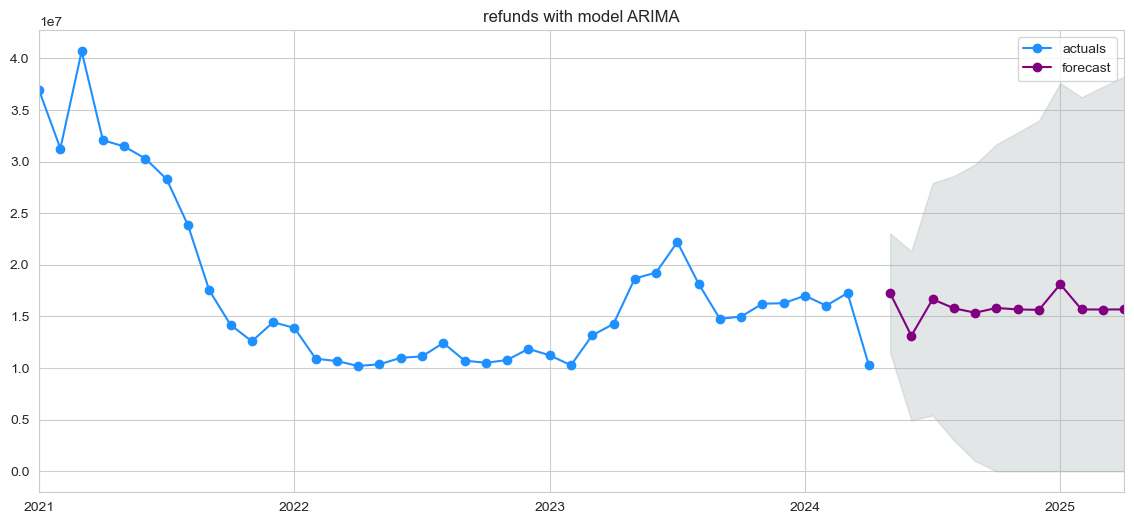

In [6]:
prediction.plot(model.df_wide_numeric, 
                series = model.df_wide_numeric.columns[0], 
                start_date = df.index.min(),
                figsize = (14,6), 
                colors = ['dodgerblue','purple'],
                marker = 'o'
               );

In [7]:
model

Initiated AutoTS object with best model: 
ARIMA
{'fillna': 'cubic', 'transformations': {'0': 'AlignLastValue', '1': 'AlignLastValue', '2': 'LevelShiftTransformer'}, 'transformation_params': {'0': {'rows': 1, 'lag': 2, 'method': 'multiplicative', 'strength': 1.0, 'first_value_only': False}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '2': {'window_size': 30, 'alpha': 3.0, 'grouping_forward_limit': 2, 'max_level_shifts': 5, 'alignment': 'rolling_diff'}}}
{'p': 2, 'd': 1, 'q': 3, 'regression_type': 'Holiday'}
Validation: 0, 1
SMAPE: 15.59757848118081, 9.807850219468436
MAE: 2524961.942502319, 1158108.318013048
SPL: 0.8830829183962595, 0.1776459815087235

Mean Absolute Error | MAE   = 1/n * Σ|actual - predicted|
Symmetric MAPE      | SMAPE = 100 / n * Σ[2 * |actual - predicted| / (|actual| + |predicted|)]
Scaled Pinball Loss | SPL   = 1/n * Σ[τ * (|actual - predicted|) if actual >= predicted else (1-τ) * (|actual - predicted|)]

In [8]:
model_results = model.results()
validation_results = model.results('validation')
model_results.Model.unique().tolist()

['ARIMA',
 'AverageValueNaive',
 'DatepartRegression',
 'ETS',
 'GLM',
 'GLS',
 'LastValueNaive',
 'SeasonalNaive',
 'UnobservedComponents',
 'ConstantNaive',
 'FBProphet',
 'ARDL',
 'UnivariateMotif',
 'Theta',
 'UnivariateRegression',
 'ARCH',
 'SeasonalityMotif',
 'NeuralProphet',
 'FFT',
 'KalmanStateSpace',
 'MLEnsemble',
 'MetricMotif',
 'PreprocessingRegression']

In [9]:
prediction.forecast.astype(int)

,refunds
2024-05-01,17274184
2024-06-01,13129009
2024-07-01,16670760
2024-08-01,15793409
2024-09-01,15364077
2024-10-01,15825228
2024-11-01,15682609
2024-12-01,15642281
2025-01-01,18122881
2025-02-01,15679189
